In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 워닝 무시

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', 100)

# 데이터 분석 필수 라이브러리 4종 세트 불러오기


# https://www.data.go.kr/data/15074777/fileData.do

# nb뷰어 => 쥬피터를 프레젠테이션으로 보여줄 수 있는!

# 자료공부

In [3]:
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,16,1,107,-,0,0,50.0,0.0,0.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,2022-03-31,목,2,2,107,-,0,0,80.0,0.0,43200.0,0.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,2022-06-13,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,2021-10-20,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [6]:
test

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
0,TEST_000000,2022-08-25,목,17,3,107,연삼로,0,0,70.0,0.0,0.0,0.0,0,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음
1,TEST_000001,2022-08-09,화,12,2,103,일반국도12호선,0,0,70.0,0.0,0.0,0.0,3,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음
2,TEST_000002,2022-08-05,금,2,1,103,일반국도16호선,0,0,60.0,0.0,0.0,0.0,0,도순3교,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음
3,TEST_000003,2022-08-18,목,23,3,103,일반국도11호선,0,0,70.0,0.0,0.0,0.0,0,아라주공아파트,33.473494,126.545647,없음,인다마을,33.471061,126.545467,없음
4,TEST_000004,2022-08-10,수,17,3,106,번영로,0,0,70.0,0.0,0.0,0.0,0,부록교 시종점,33.501477,126.569223,없음,봉개교 시종점,33.496863,126.581230,없음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291236,TEST_291236,2022-08-27,토,5,1,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,월산마을,33.472819,126.463030,없음,도근교,33.470483,126.460846,없음
291237,TEST_291237,2022-08-19,금,20,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,영주교,33.305359,126.598914,없음,하례입구삼거리,33.300796,126.600332,없음
291238,TEST_291238,2022-08-05,금,11,1,107,신대로,0,0,30.0,0.0,0.0,0.0,0,마리나사거리,33.493624,126.496769,있음,칠오광장사거리,33.497500,126.496946,있음
291239,TEST_291239,2022-08-12,금,7,2,107,경찰로,0,0,60.0,0.0,0.0,0.0,0,국민의료보험관리공단,33.254782,126.507014,없음,의료보험조합,33.255659,126.507333,없음


In [7]:
sample_submission = pd.read_csv("sample_submission.csv")

sample_submission

,id,target
0,TEST_000000,0
1,TEST_000001,0
2,TEST_000002,0
3,TEST_000003,0
4,TEST_000004,0
...,...,...
291236,TEST_291236,0
291237,TEST_291237,0
291238,TEST_291238,0
291239,TEST_291239,0


In [5]:
data_info = pd.read_csv("data_info.csv")

data_info

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


# 데이터 전처리

- 전처리 하면서 데이터 공부

In [13]:
train = pd.read_csv("train.csv" , parse_dates = ["base_date"])


print(train.shape)


# 데이터 전처리 : train 데이터 - base_date 를 날짜 데이터로 바꾸어야 되겠다!

# 단순히 target => 속도이니 속도에 영향을 미치는 것들 위주로 피처 추출! 해야겠다고 추측!

(4701217, 23)


In [14]:
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,16,1,107,-,0,0,50.0,0.0,0.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,2022-03-31,목,2,2,107,-,0,0,80.0,0.0,43200.0,0.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,2022-06-13,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,2021-10-20,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [8]:
# null인 데이터 확인

train.isnull().sum()

# 딱히 없음! 그러나 road_name 이 - 인 부분을 버려야 한다!

#  다른 방법! nulls = train[train.isnull().any(axis = 1)]

# 또한 , vehicle_restricted  , height_restricted 은 다 0이네! 필요 없는 듯!

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

In [8]:
train['road_name'].value_counts()

일반국도12호선    1046092
-            569463
일반국도16호선     554510
일반국도95호선     248181
일반국도11호선     215701
             ...   
애원로            7718
아봉로            7342
남조로            6813
호서중앙로          2819
호근로             587
Name: road_name, Length: 61, dtype: int64

In [9]:
# road_name 이 - 인 건 버리기!

#train2 = train[train['road_name'] == '-'].index

train2 = train[train['road_name'].str.contains('-')].index

In [10]:
train.drop(train2 , inplace = True)

train

# 4701217  - 4131754 = 569463

# 약 , 560000개 의 ROW가 버려졌다!

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701210,TRAIN_4701210,2022-01-05,수,14,1,107,관광단지로,0,0,30.0,0.0,0.0,0.0,0,산신주유소,33.255215,126.414236,없음,관광단지입구,33.258119,126.415840,없음,25.0
4701211,TRAIN_4701211,2021-12-30,목,14,1,103,일반국도16호선,0,0,50.0,0.0,0.0,0.0,0,우사,33.358358,126.271652,없음,상명,33.359839,126.267783,없음,27.0
4701214,TRAIN_4701214,2022-06-13,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,2021-10-20,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [11]:
# 0인 값 버리기

train.drop('vehicle_restricted' ,axis =1 ,inplace = True )
train.drop('height_restricted' ,axis =1 ,inplace = True )

In [12]:
# 위도, 경도 중 하나만 남기고 버리기!

train.drop('start_longitude' ,axis =1 ,inplace = True ) # 차가 출발할때의 경도
train.drop('end_longitude' ,axis =1 ,inplace = True ) # 차가 도착할때의 경도

In [15]:
# 날짜 분리

train['year'] = train['base_date'].dt.year
train['month'] = train['base_date'].dt.month
train['day'] = train['base_date'].dt.day


# date는 연월일 다 나오니 base_date 와 똑같으니 제외!

# quarter도 제외! 

# dayofweek제외! day_of_week이 있으니까!

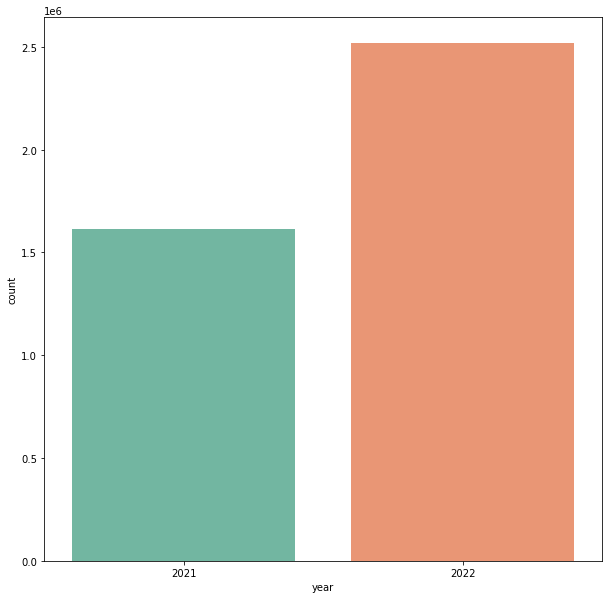

In [14]:
# 년도 별!

plt.figure(figsize = ( 10, 10))

sns.countplot(data = train , x = 'year' , palette = 'Set2')

plt.show()

# 요인 : 엔데믹으로 돌아섰지만 해외여행은 아직 부담스럽다! 그래서 제주도 여행으로 대체 상품을 하는 것이지!

# 또한, 국제선 노선이 아직 부족하고 러시아의 우크라이나 침공, 글로벌 경제위기 등 악재가 겹치면서 해외여행이 활성화 되지 않았지!

In [16]:
# 1차 기준 년도 , 2차기준 월별로 해주고 칼럼에 저장!

# 데이터 왜곡 방지! 그리고 데이터를 더 잘 보기 위해서.


date = ['year' , 'month']


train['year-month'] = train[date].apply(lambda row : '-'.join(row.values.astype(str)) , axis = 1  )

In [16]:
# 계절별 분리

train['year-month'].unique()

# 2021-9 , 2021-10 , 2021-11 , 2021-12 , 2022-1 , 2022-2 , 2022-3 , 2022-5 , 2022-6 ,2022-7


# 2022-4 , 2022 - 8이 없음. 이것도 데이터 왜곡이 일어날 수 있겠네!

array(['2022-6', '2022-7', '2021-10', '2022-3', '2021-9', '2021-12',
       '2022-5', '2022-2', '2022-1', '2021-11'], dtype=object)

In [17]:
# 계절별 분리!

def season(x):

    if (x == '2021-9' or x == '2021-10' or x == '2021-11'):
        
        return "2021-fall"
    
    elif (x == '2021-12' or x == '2022-1' or x == '2022-2'):
        return "2021, 2022 -winter"
    
    elif ( x == '2022-3' or x == '2022-5'):
        return "2022-spring"
    
    else:
        return "2022-summer"
    

In [18]:
train['season'] = train['year-month'].apply(lambda x : season(x) )

In [19]:
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_node_name,start_latitude,start_turn_restricted,end_node_name,end_latitude,end_turn_restricted,target,year,month,day,year-month,season
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,32400.0,3,제3교래교,33.427747,없음,제3교래교,33.427749,없음,52.0,2022,6,23,2022-6,2022-summer
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0,광양사거리,33.500730,있음,KAL사거리,33.504811,없음,30.0,2022,7,28,2022-7,2022-summer
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0,창고천교,33.279145,없음,상창육교,33.280072,없음,61.0,2021,10,10,2021-10,2021-fall
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0,남양리조트,33.246081,없음,서현주택,33.245565,없음,20.0,2022,3,11,2022-3,2022-spring
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0,애월샷시,33.462214,없음,애월입구,33.462677,없음,38.0,2021,10,5,2021-10,2021-fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701210,TRAIN_4701210,2022-01-05,수,14,1,107,관광단지로,0,0,30.0,0.0,0,산신주유소,33.255215,없음,관광단지입구,33.258119,없음,25.0,2022,1,5,2022-1,"2021, 2022 -winter"
4701211,TRAIN_4701211,2021-12-30,목,14,1,103,일반국도16호선,0,0,50.0,0.0,0,우사,33.358358,없음,상명,33.359839,없음,27.0,2021,12,30,2021-12,"2021, 2022 -winter"
4701214,TRAIN_4701214,2022-06-13,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0,고성교차로,33.447183,없음,성산교차로,33.444121,없음,30.0,2022,6,13,2022-6,2022-summer
4701215,TRAIN_4701215,2021-10-20,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0,제6광령교,33.443596,없음,관광대학입구,33.444996,없음,73.0,2021,10,20,2021-10,2021-fall


In [20]:
train.info()


# datetime 계열 1개 , 실수형 5개 , 정수형 9개 , 문자형 9개

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4131754 entries, 0 to 4701216
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   id                     object        
 1   base_date              datetime64[ns]
 2   day_of_week            object        
 3   base_hour              int64         
 4   lane_count             int64         
 5   road_rating            int64         
 6   road_name              object        
 7   multi_linked           int64         
 8   connect_code           int64         
 9   maximum_speed_limit    float64       
 10  weight_restricted      float64       
 11  road_type              int64         
 12  start_node_name        object        
 13  start_latitude         float64       
 14  start_turn_restricted  object        
 15  end_node_name          object        
 16  end_latitude           float64       
 17  end_turn_restricted    object        
 18  target                

In [21]:
train.describe()

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_latitude,end_latitude,target,year,month,day
count,4.131754e+06,4.131754e+06,4.131754e+06,4.131754e+06,4.131754e+06,4.131754e+06,4.131754e+06,4.131754e+06,4.131754e+06,4.131754e+06,4.131754e+06,4.131754e+06,4.131754e+06,4.131754e+06
mean,1.187150e+01,1.873600e+00,1.046771e+02,5.419006e-04,3.026865e-01,6.176754e+01,5.529066e+03,6.364706e-01,3.338534e+01,3.338534e+01,4.251470e+01,2.021610e+03,6.301117e+00,1.508087e+01
std,6.749225e+00,7.022213e-01,1.788598e+00,2.327245e-02,5.575401e+00,1.164130e+01,1.382777e+04,1.226506e+00,1.041531e-01,1.041467e-01,1.616284e+01,4.878572e-01,3.763730e+00,9.052536e+00
min,0.000000e+00,1.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,3.000000e+01,0.000000e+00,0.000000e+00,3.324451e+01,3.324451e+01,1.000000e+00,2.021000e+03,1.000000e+00,1.000000e+00
25%,6.000000e+00,1.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,5.000000e+01,0.000000e+00,0.000000e+00,3.326176e+01,3.326176e+01,3.000000e+01,2.021000e+03,3.000000e+00,7.000000e+00
50%,1.200000e+01,2.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00,3.341942e+01,3.341942e+01,4.300000e+01,2.022000e+03,6.000000e+00,1.500000e+01
75%,1.800000e+01,2.000000e+00,1.060000e+02,0.000000e+00,0.000000e+00,7.000000e+01,0.000000e+00,0.000000e+00,3.348366e+01,3.348366e+01,5.400000e+01,2.022000e+03,1.000000e+01,2.300000e+01
max,2.300000e+01,3.000000e+00,1.070000e+02,1.000000e+00,1.030000e+02,8.000000e+01,5.000000e+04,3.000000e+00,3.355532e+01,3.355532e+01,1.130000e+02,2.022000e+03,1.200000e+01,3.100000e+01


In [5]:
test = pd.read_csv("test.csv" , parse_dates = ["base_date"])

test

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
0,TEST_000000,2022-08-25,목,17,3,107,연삼로,0,0,70.0,0.0,0.0,0.0,0,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음
1,TEST_000001,2022-08-09,화,12,2,103,일반국도12호선,0,0,70.0,0.0,0.0,0.0,3,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음
2,TEST_000002,2022-08-05,금,2,1,103,일반국도16호선,0,0,60.0,0.0,0.0,0.0,0,도순3교,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음
3,TEST_000003,2022-08-18,목,23,3,103,일반국도11호선,0,0,70.0,0.0,0.0,0.0,0,아라주공아파트,33.473494,126.545647,없음,인다마을,33.471061,126.545467,없음
4,TEST_000004,2022-08-10,수,17,3,106,번영로,0,0,70.0,0.0,0.0,0.0,0,부록교 시종점,33.501477,126.569223,없음,봉개교 시종점,33.496863,126.581230,없음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291236,TEST_291236,2022-08-27,토,5,1,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,월산마을,33.472819,126.463030,없음,도근교,33.470483,126.460846,없음
291237,TEST_291237,2022-08-19,금,20,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,영주교,33.305359,126.598914,없음,하례입구삼거리,33.300796,126.600332,없음
291238,TEST_291238,2022-08-05,금,11,1,107,신대로,0,0,30.0,0.0,0.0,0.0,0,마리나사거리,33.493624,126.496769,있음,칠오광장사거리,33.497500,126.496946,있음
291239,TEST_291239,2022-08-12,금,7,2,107,경찰로,0,0,60.0,0.0,0.0,0.0,0,국민의료보험관리공단,33.254782,126.507014,없음,의료보험조합,33.255659,126.507333,없음


In [23]:
sample_submission = pd.read_csv("sample_submission.csv")

print(sample_submission)

                 id  target
0       TEST_000000       0
1       TEST_000001       0
2       TEST_000002       0
3       TEST_000003       0
4       TEST_000004       0
...             ...     ...
291236  TEST_291236       0
291237  TEST_291237       0
291238  TEST_291238       0
291239  TEST_291239       0
291240  TEST_291240       0

[291241 rows x 2 columns]


In [24]:
test.isnull().sum()

# test 데이터도 road_name이 -인 부분을 버려야 한다 생각했는데 , Test 데이터 Row를 없애면

# sample_submission 과 row가 안맞게 되니까 걍 넘어감!

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
dtype: int64

In [25]:
# 0인 값 버리기

test.drop('vehicle_restricted' ,axis =1 ,inplace = True )
test.drop('height_restricted' ,axis =1 ,inplace = True )

In [26]:
# 위도, 경도 중 하나만 남기고 버리기!

test.drop('start_longitude' ,axis =1 ,inplace = True )
test.drop('end_longitude' ,axis =1 ,inplace = True )

In [27]:
# 날짜 분리. dayofweek 제외!

test['year'] = test['base_date'].dt.year
test['month'] = test['base_date'].dt.month
test['day'] = test['base_date'].dt.day


# date는 연월일 다 나오니 base_date 와 똑같으니 제외!

# quarter도 제외! 

# dayofweek제외! day_of_week이 있으니까!

# EDA

In [28]:
# 해당 표들은 크게 보기 위해서 개별 시각화만 진행함!

plt.rcParams['font.family'] ='Malgun Gothic'

plt.rcParams['axes.unicode_minus'] =False

# 한글 깨짐 방지 현상 제거

In [29]:
# 계절별 시각화

# 크기별!

x1 = train["season"].value_counts().index # 1월 12월 큰 순으로!
y1 = train["season"].value_counts().values

In [44]:
# 연도별 , 월별 시각화

x2 = train["year-month"].value_counts().index # 연도 1차 , 월 2차 큰 순으로!
y2 = train["year-month"].value_counts().values

In [43]:
x3 = train["day"].value_counts().index # day 시각화!
y3 = train["day"].value_counts().values

In [42]:
x4 = train["base_hour"].value_counts().index # 시간대별 시각화!
y4 = train["base_hour"].value_counts().values

In [64]:
x5 = train["day_of_week"].value_counts().index # 요일!
y5 = train["day_of_week"].value_counts().values

[Text(0.5, 0, 'count'), Text(0.5, 1.0, '요일별 분포')]

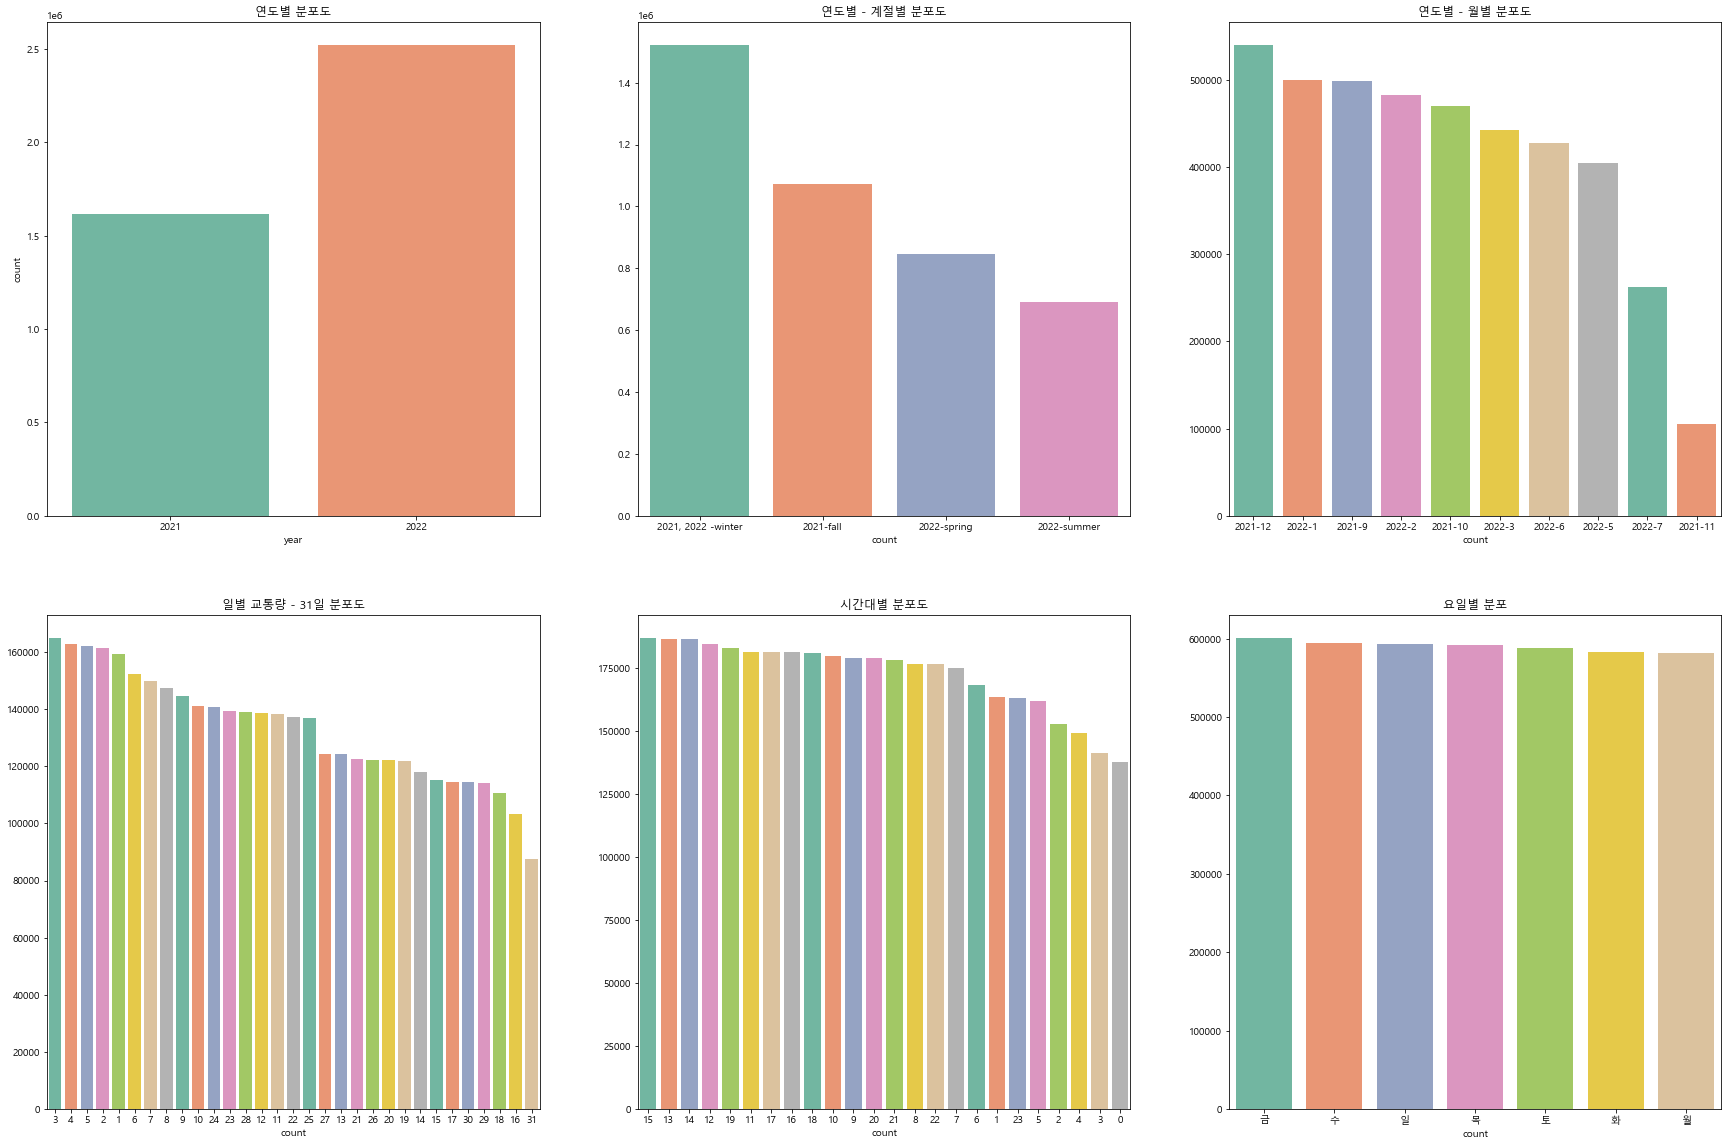

In [73]:
figure , ((ax1 , ax2 , ax3) , (ax4 , ax5 , ax6)) = plt.subplots(nrows = 2 , ncols = 3) # 테이블 위치 ax1 ~ ax6 지정

figure.set_size_inches(30 , 20)

sns.countplot(data = train , x = "year" , ax = ax1 , palette = "Set2")


# ax2에 계절별 들어가면 좋겠네!

sns.barplot( x = x1 , y = y1 , order = x1 ,  ax = ax2   ,palette = "Set2"  )



sns.barplot( x = x2 , y = y2 , order = x2 , ax = ax3  ,palette = "Set2"  )


sns.barplot(x = x3 , y = y3 , order = x3 , ax = ax4 ,   palette = "Set2")

sns.barplot(x = x4 , y= y4 , order = x4   , ax = ax5 , palette = "Set2")

sns.barplot(x = x5 , y = y5  ,   ax = ax6 , palette = "Set2")


# ID 가 아니더라도 갯수를 새는 것이니 교통량으로 봄!


# date는 필요없는듯?



ax1.set(ylabel='count',title="연도별 분포도")
ax2.set(xlabel='count',title="연도별 - 계절별 분포도")
ax3.set(xlabel='count', title="연도별 - 월별 분포도")
ax4.set(xlabel='count', title="일별 교통량 - 31일 분포도")
ax5.set(xlabel= 'count' , title = "시간대별 분포도"    )
ax6.set(xlabel= 'count' , title = "요일별 분포"    )

- 2021년 보다 2022년이 분포도가 더 많다!
- 겨울 , 가을 , 봄 , 여름 순으로 데이터 순이 많다!
- 2021년 12월 , 2022년 1월 , 2021년 9월 순으로 데이터가 있다!
- 2021년 11월이 데이터가 가장 작다!
- 일별은 3일 4일이 가장 많고 31일이 가장 적다!
- 시간대별은 오후 3시 , 1시, 2시 등이 가장 많고 0시에 가장 적다!
- 요일별은 금 , 수가 많다!

- 이 데이터를 조사한 것에 한해서는 그렇다는 의미!

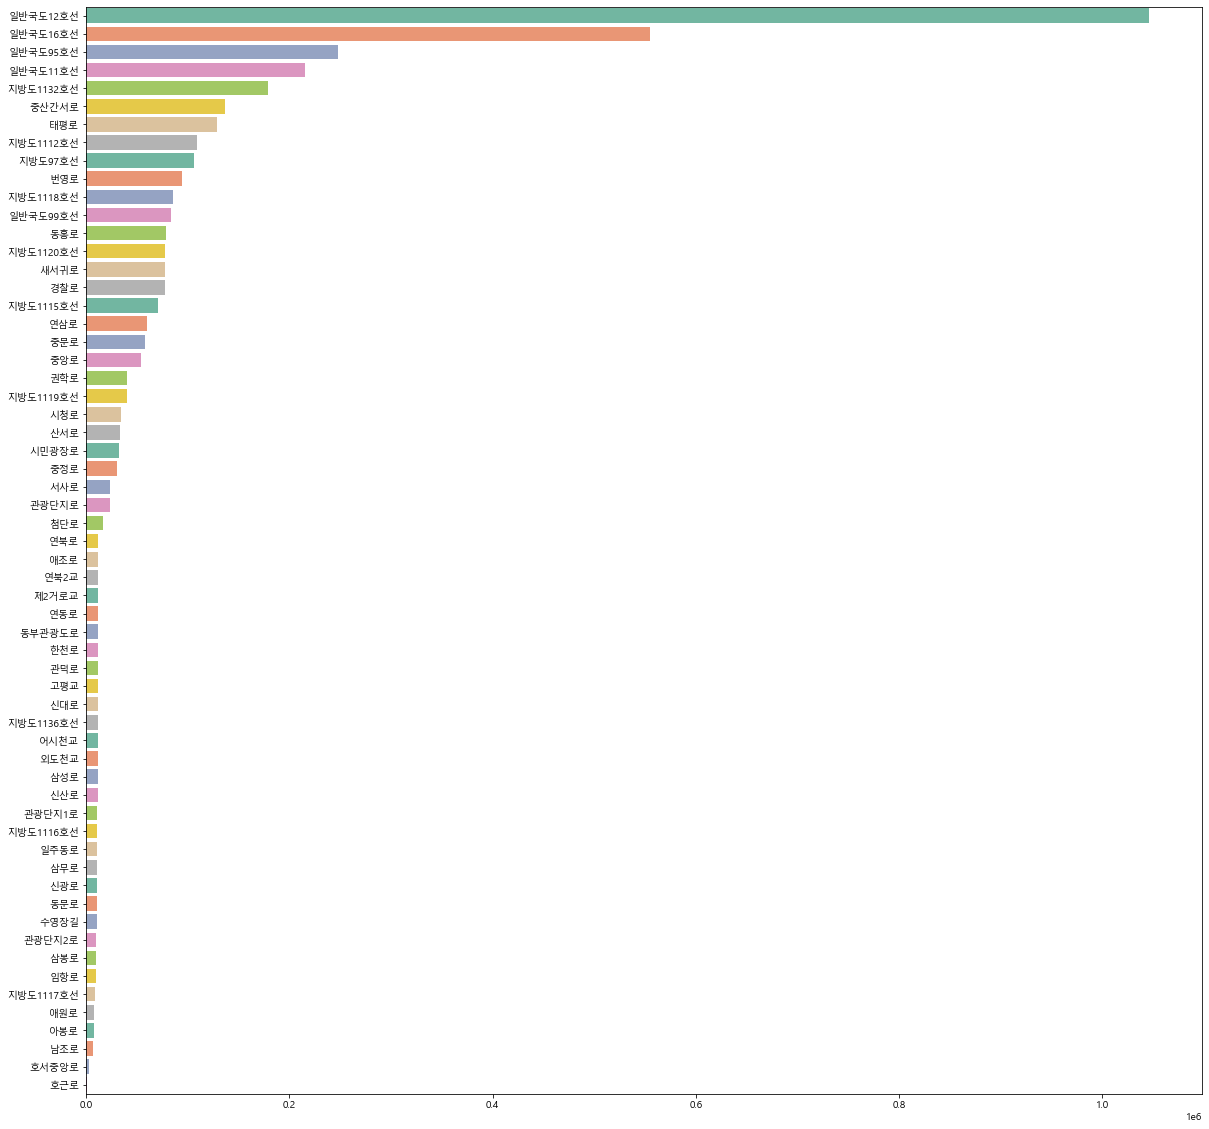

In [74]:
x6 = train['road_name'].value_counts().index # 도로 이름 큰 순으로!
y6 = train['road_name'].value_counts().values


plt.figure(figsize = (20, 20))

sns.barplot( x = y5 , y = x5 , order = x5 , palette = "Set2" , )

plt.show()

# 도로 이름의 분포도

- 일반국도가 분포가 가장 많다!

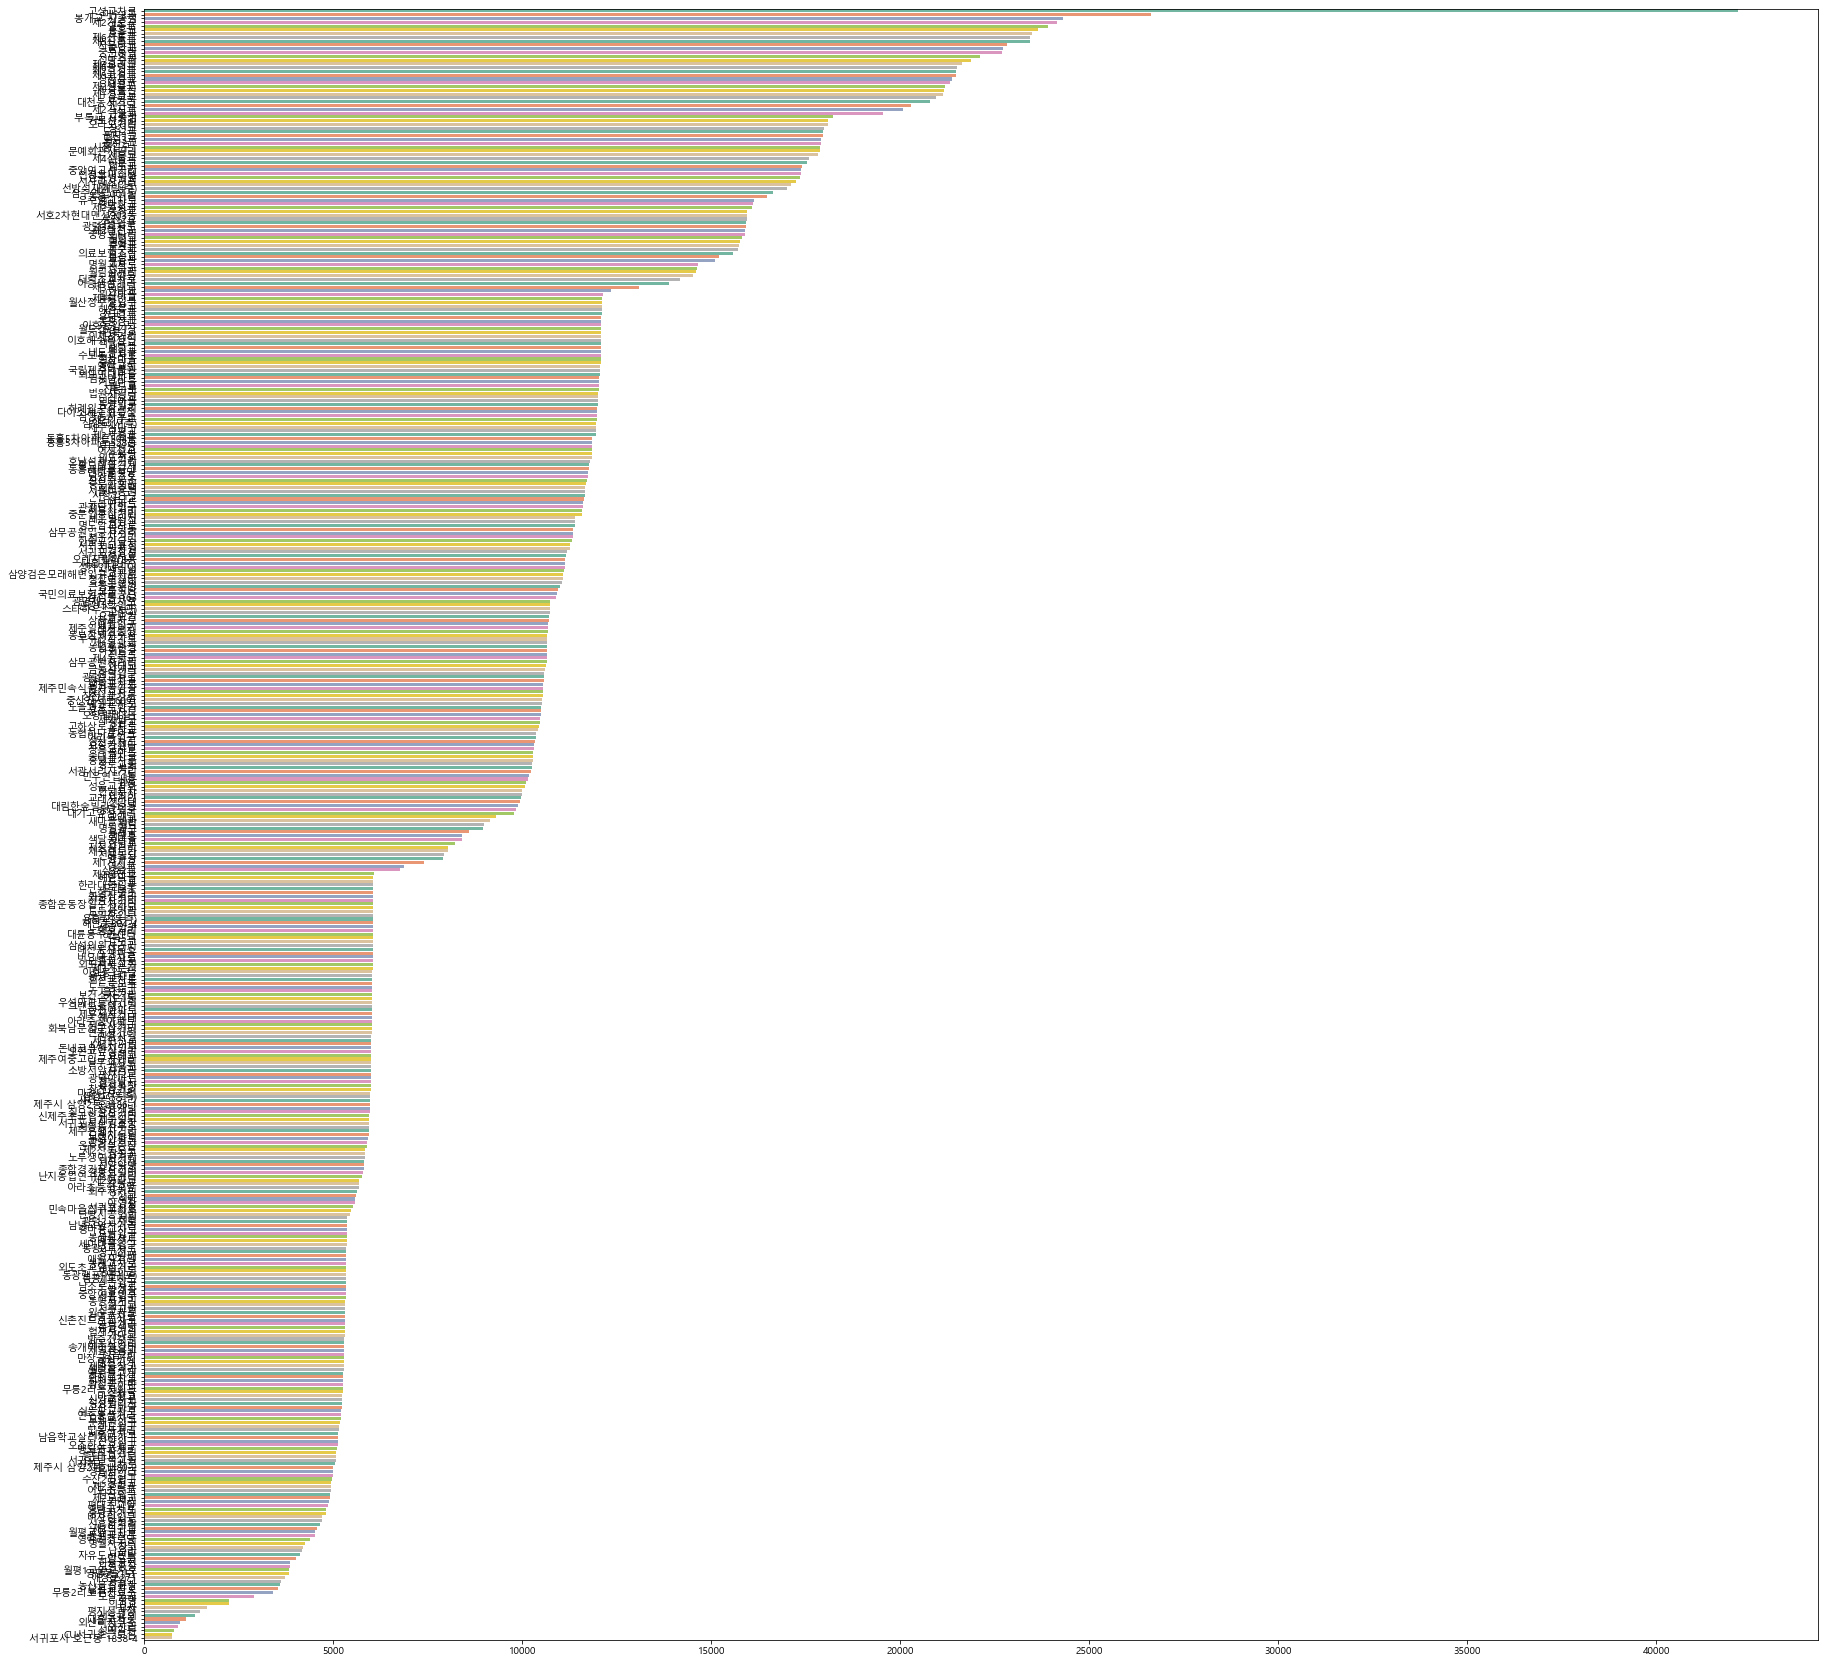

In [84]:
x7 = train['start_node_name'].value_counts().index # 도로 이름 큰 순으로!
y7 = train['start_node_name'].value_counts().values


plt.figure(figsize = (30, 30))

sns.barplot( x = y7 , y = x7 , order = x7 , palette = "Set2" , )

plt.show()

In [9]:
train['start_node_name'].value_counts() # 출발지점명

고성교차로              42169
산신주유소              29386
미수2교               26635
영주교                24381
봉개교 시종점            24290
                   ...  
외산리사무소               934
와산리                  881
성미가든                 788
서귀포시 호근동 1838-4      744
CU서귀호근로점             744
Name: start_node_name, Length: 487, dtype: int64

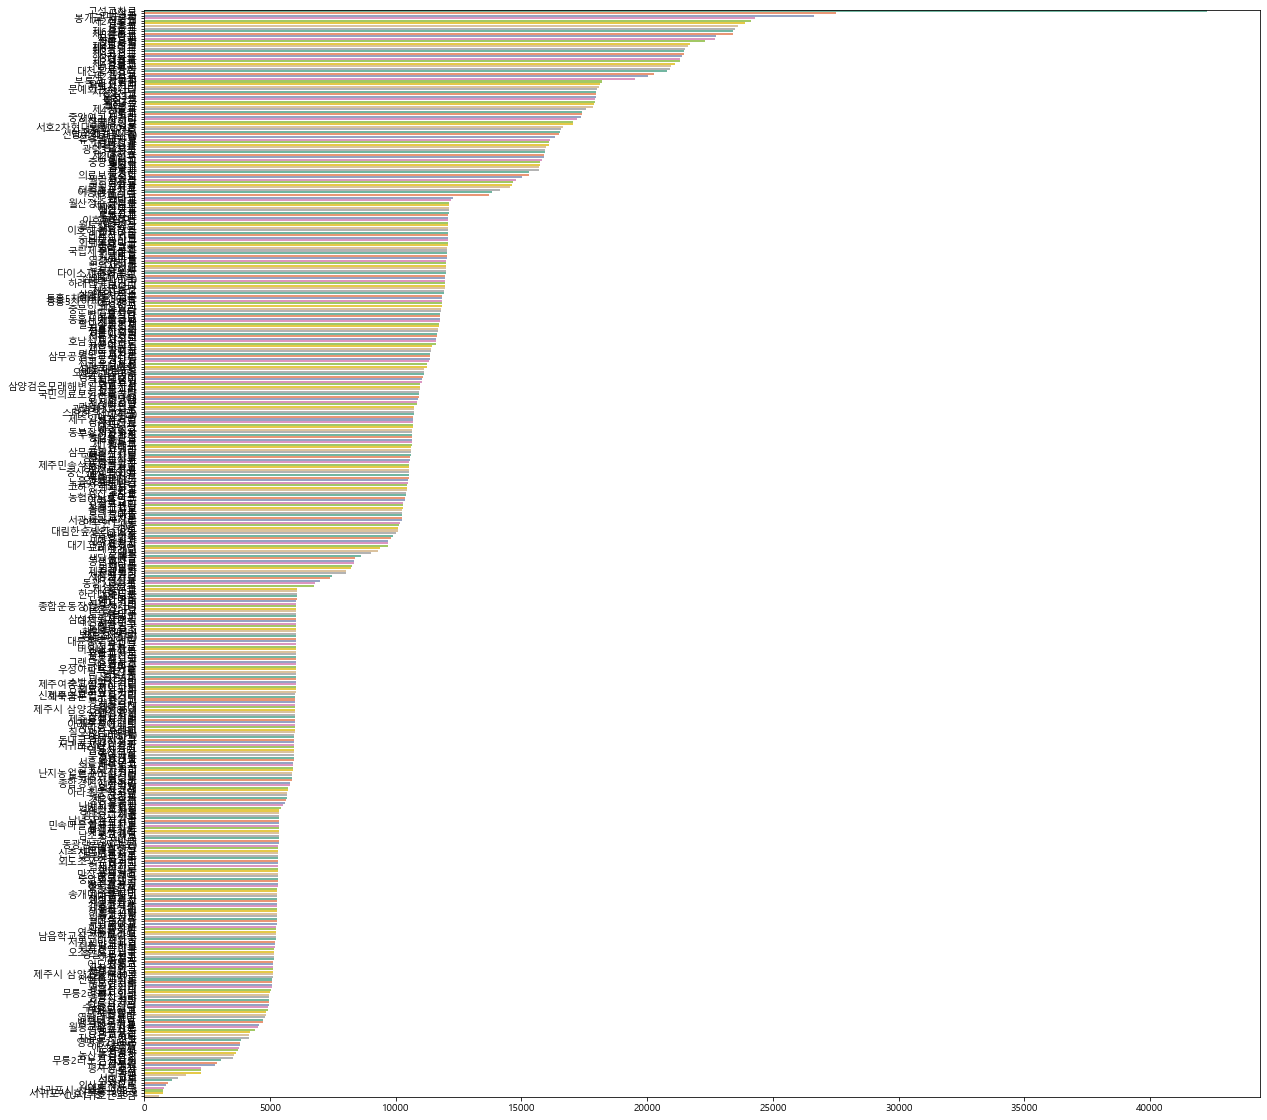

In [85]:
x8 = train['end_node_name'].value_counts().index # 도로 이름 큰 순으로!
y8 = train['end_node_name'].value_counts().values


plt.figure(figsize = (20, 20))

sns.barplot( x = y8 , y = x8 , order = x8 , palette = "Set2" , )

plt.show()

In [10]:
train['end_node_name'].value_counts() # 도착지점명

고성교차로              42265
산신주유소              29202
구엄교                27510
미수2교               26621
영주교                24370
                   ...  
외산리사무소               881
대흘교차로                788
서귀포시 서호동 308-6       744
서귀포시 호근동 1838-4      744
CU서귀호근로점             587
Name: end_node_name, Length: 487, dtype: int64

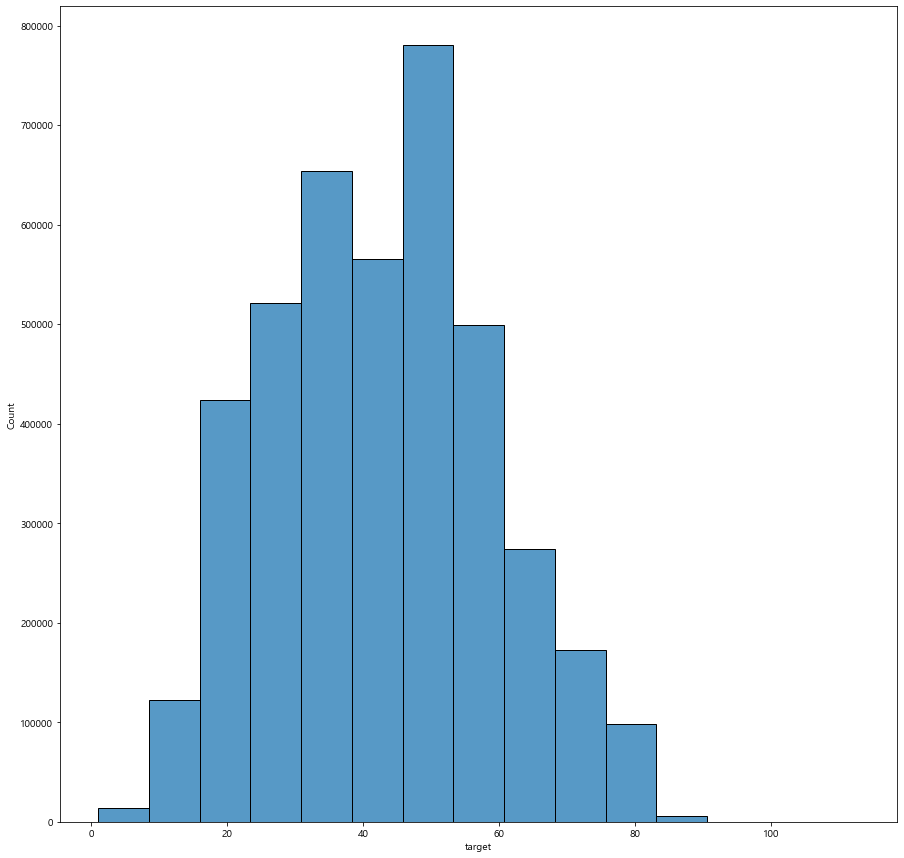

In [63]:
plt.figure(figsize = (15 , 15))

sns.histplot(data = train , x = "target" , bins = 15)

plt.show()

# 속도는 30~ 60사이에 분포가 되어있다!

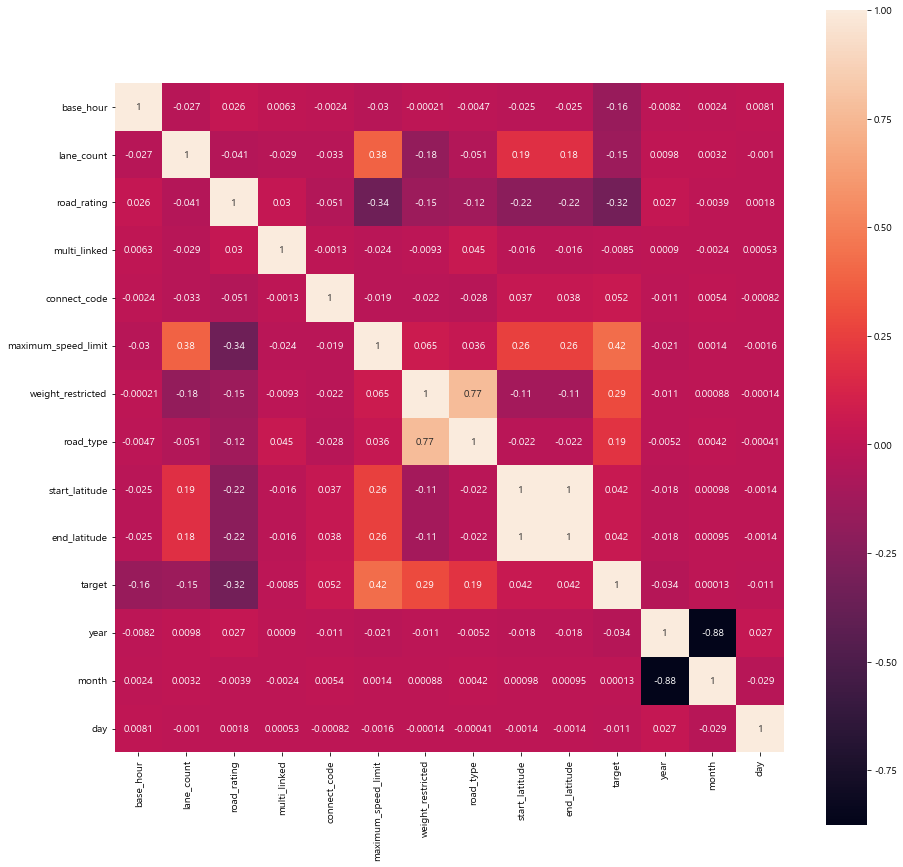

In [61]:
plt.figure(figsize = (15 , 15))

sns.heatmap(data = train.corr() , square = True , annot = True)

plt.show()

# 상관관계

# 여기서보면 target과 관련이 있는 것들은

# road_rating (도로 등급) , maximum_speed_limit (최고 제한 속도) , 
# weight_restricted (차량 무게 제한)  가 관련이 있는 듯!

In [78]:
group_names_year_month = ['2021-9' ,'2021-10' , '2021-11' , '2021-12' , '2022-1' , '2022-2' , '2022-3' , '2022-5' , '2022-6' , '2022-7'  ]

group_names_season = ['2021-fall' , '2021, 2022 -winter' , '2022-spring' , '2022-summer'      ]

[Text(0.5, 0, 'day'), Text(0, 0.5, 'target'), Text(0.5, 1.0, '일별 속도')]

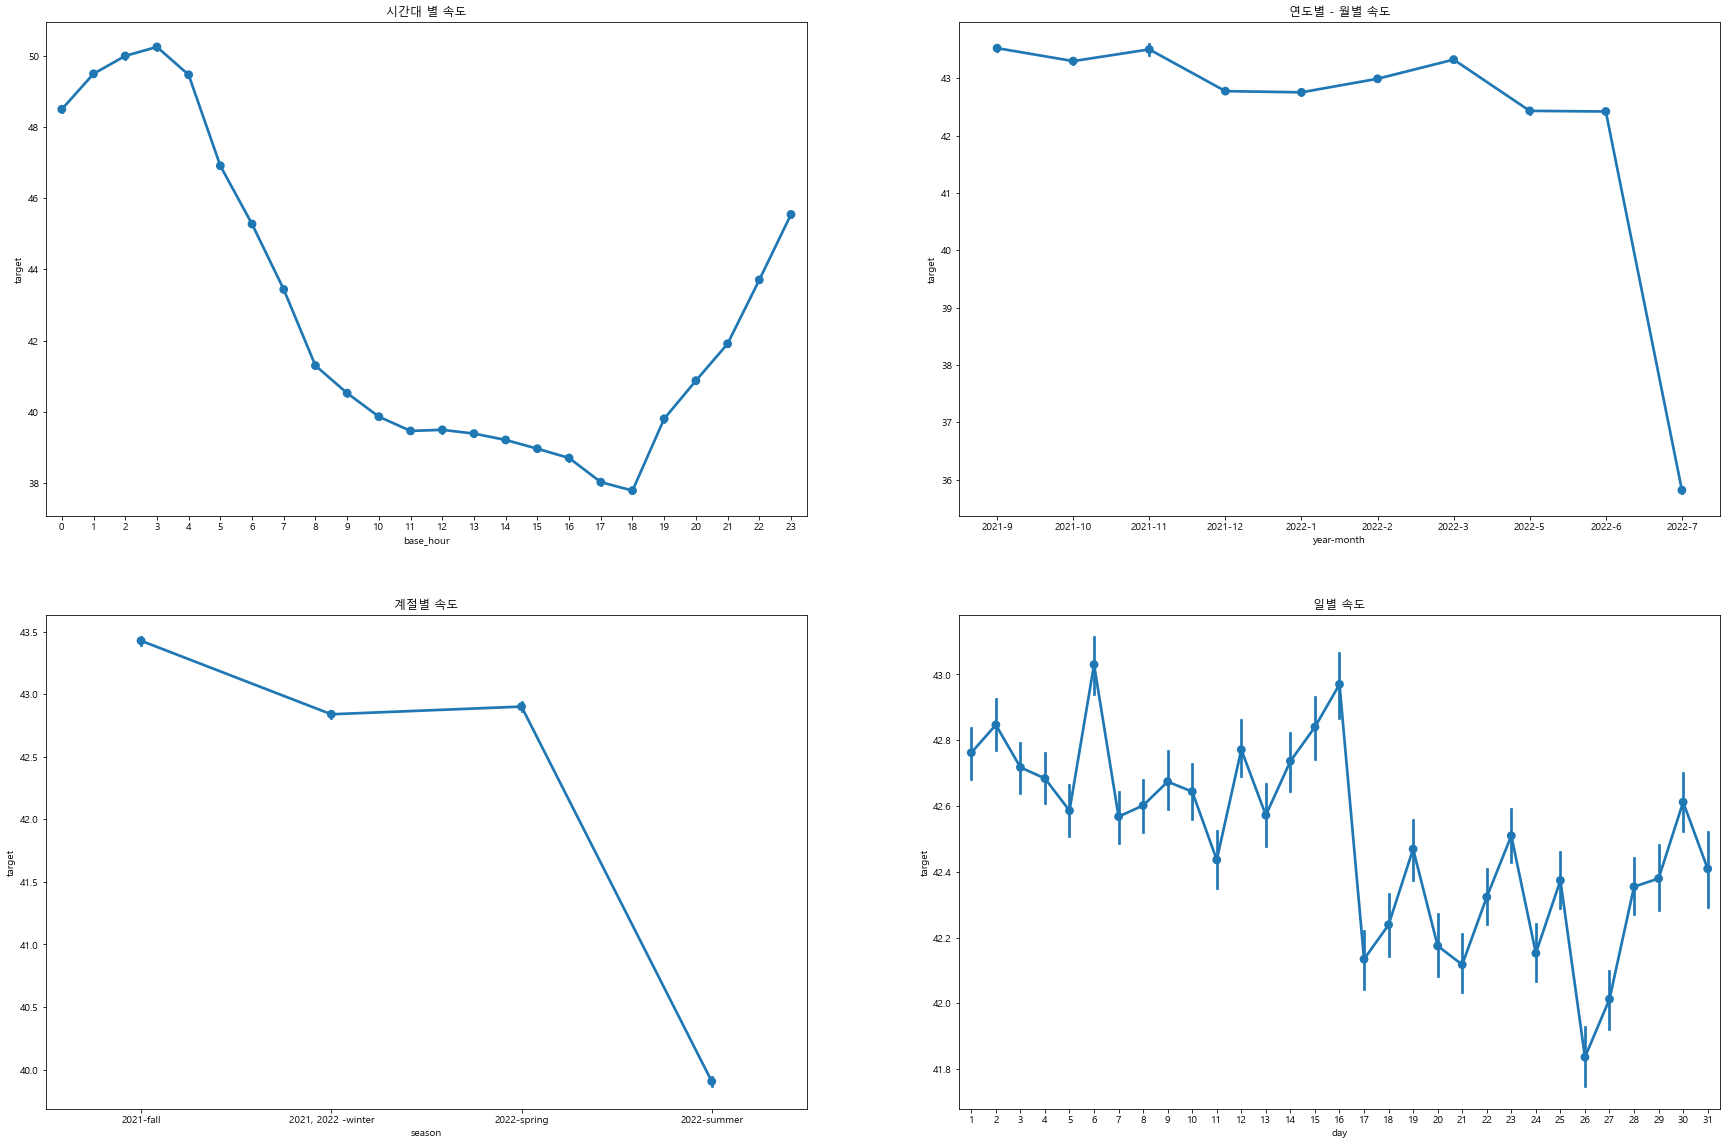

In [79]:
figure, axis = plt.subplots(nrows=2, ncols=2)          # 테이블 위치 (2, 2) 지정
figure.set_size_inches(30, 20)

sns.pointplot(data =train ,x = 'base_hour' , y = 'target', ax = axis[0][0])



sns.pointplot(data =train , x = 'year-month', y = 'target', order = group_names_year_month , ax = axis[0][1])

sns.pointplot(data =train , x = 'season' , y = 'target', order = group_names_season , ax = axis[1][0] )

sns.pointplot(data =train , x = 'day', y = 'target', ax = axis[1][1])


# 라벨 달기

axis[0][0].set(ylabel = 'target' , title = '시간대 별 속도' )
axis[0][1].set(xlabel = 'year-month' , ylabel = 'target' , title = "연도별 - 월별 속도")
axis[1][0].set(xlabel = 'season' , ylabel = 'target' , title = '계절별 속도' )
axis[1][1].set(xlabel = 'day' , ylabel = 'target' , title  = '일별 속도')



- 오전 9시 ~ 오후 6시에 속도가 급격히 느려진다! 교통량이 많았다는 뜻! 이것도 피쳐로 적절
- 2022년 7월에 속도가 확 낮춰짐! 마찬가지로 계절별 속도도 2022-summer 에 속도가 확 늦춰짐!
- test.csv 는 2022-8월 데이터이기 때문에 연도별 -월별 속도는 피쳐로 쓰기 적절치 않고
- 계절별 속도로 하면 2022-8월 데이터는 2022-summer 에 포함 될 것이기 때문에 피쳐로 적절하다 생각!
- day는 너무 왔다갔다! 피쳐로 적절한지 아닌지 모르겠음!

<AxesSubplot:xlabel='base_hour', ylabel='target'>

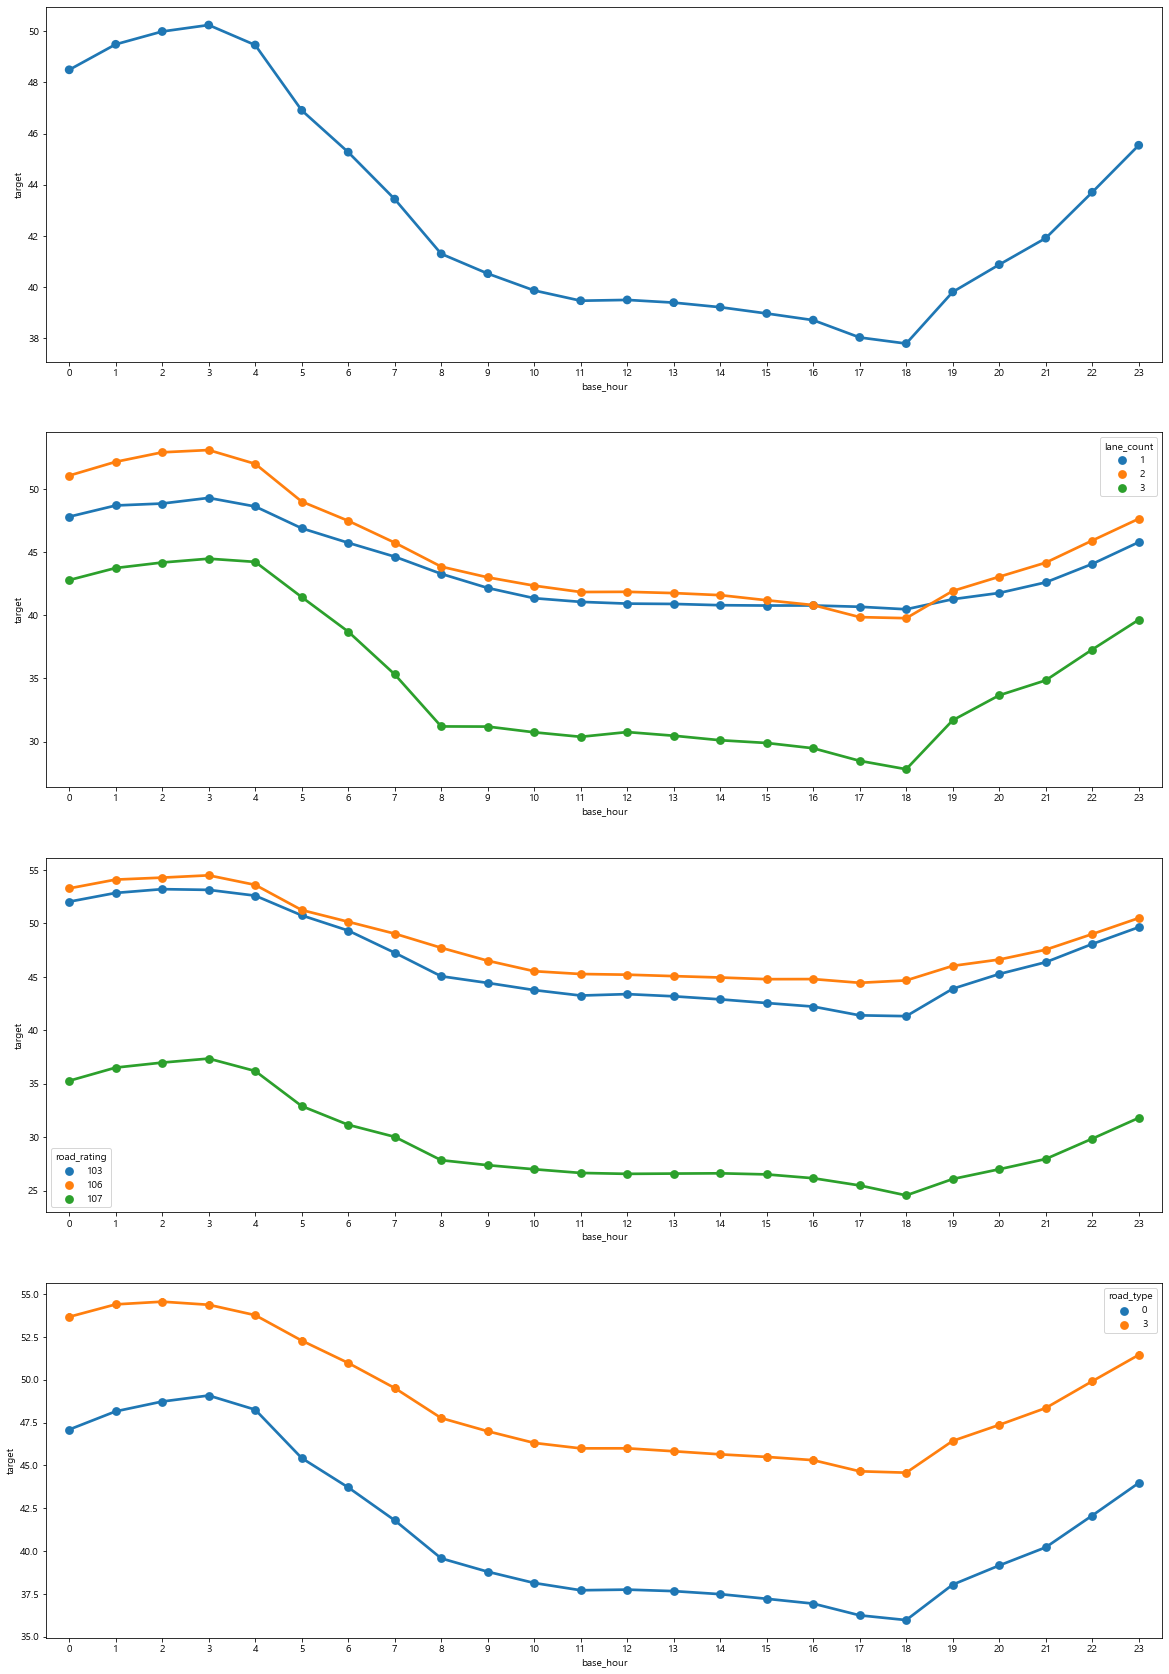

In [80]:
import matplotlib.pyplot as plt

figure, (ax1 , ax2, ax3 , ax4) = plt.subplots(nrows = 4)

figure.set_size_inches(20 , 30)

sns.pointplot(data = train , x = 'base_hour' , y = 'target' , ax = ax1    )
sns.pointplot(data = train , x = 'base_hour' , y = 'target' , hue =  'lane_count' ,ax = ax2    )  # 차로수
sns.pointplot(data = train , x = 'base_hour' , y = 'target' , hue =  'road_rating'   , ax = ax3    ) # 도로 등급 
sns.pointplot(data = train , x = 'base_hour' , y = 'target' , hue =  'road_type'   , ax = ax4    ) # 도로 타입

# 더 있는데 너무 많아서 이정도만 보여드림.

- 속도가 6시에 되면 거의 안 나는데 아마 이 의미는 러시아워의 출퇴근길 정체 때문에 속도가 낮아지는 것으로 추정!
- 그렇기 때문에 속도와 교통량은 반비례 관계인 것이 더욱 명확해 짐!

- 3차선으로 가는 차들은 러시아워 시간 때 속도가 낮으니 막히고
- 1, 2차선은 그 길로 잘 안가니 속도가 상대적으로 높다.
- 그리고 107 (시도 , 군도) 는 속도가 잘 안나네! 일반국도, 지방도는 속도가 나름 나고!
- 일반국도에서 속도는 좀 나고 , 교량은 속도가 잘 안남!

# 내가 처음에 한 모델링!

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import gc

# 여기서는 lightgbm과 RandomForestRegressor 두개 씀!

In [12]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [13]:
str_col = ['day_of_week','start_turn_restricted','end_turn_restricted']
for i in str_col:
    le = LabelEncoder()
    le=le.fit(train[i])
    train[i]=le.transform(train[i])
    
    for label in np.unique(test[i]):
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test[i]=le.transform(test[i])

In [14]:
y_train = train['target'] 

X_train = train.drop(['id','base_date', 'target','road_name', 'start_node_name', 'end_node_name','vehicle_restricted'], axis=1)

X_test = test.drop(['id','base_date', 'road_name', 'start_node_name', 'end_node_name','vehicle_restricted'], axis=1)
# name 계열은 일단 다 버림!

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(4701217, 16)
(4701217,)
(291241, 16)


In [21]:
# rmsle 방식으로 측정!

from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values, convertExp=True):

    if convertExp:
        predicted_values = np.exp(predicted_values),
        actual_values = np.exp(actual_values)
        
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    # 값이 0일 수도 있어서 로그를 취했을 때 마이너스 무한대가 될 수도 있기 때문에 1을 더해 줌
    # 로그를 씌워주는 것은 정규분포로 만들어주기 위해
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score


In [22]:
LR = lgb.LGBMRegressor(random_state=42)

y_train_log = np.log1p(y_train)

LR.fit(X_train, y_train_log)


LGBMRegressor(random_state=42)

In [23]:

# 내가 만든 모델이 작동하는지 그냥 한번 체크
preds = LR.predict(X_train)
score = rmsle(np.exp(y_train_log), np.exp(preds), False)
print ("RMSLE Value For Random Forest: ",score)

RMSLE Value For Random Forest:  0.18106198611807744


C:\Users\SEO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SEO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

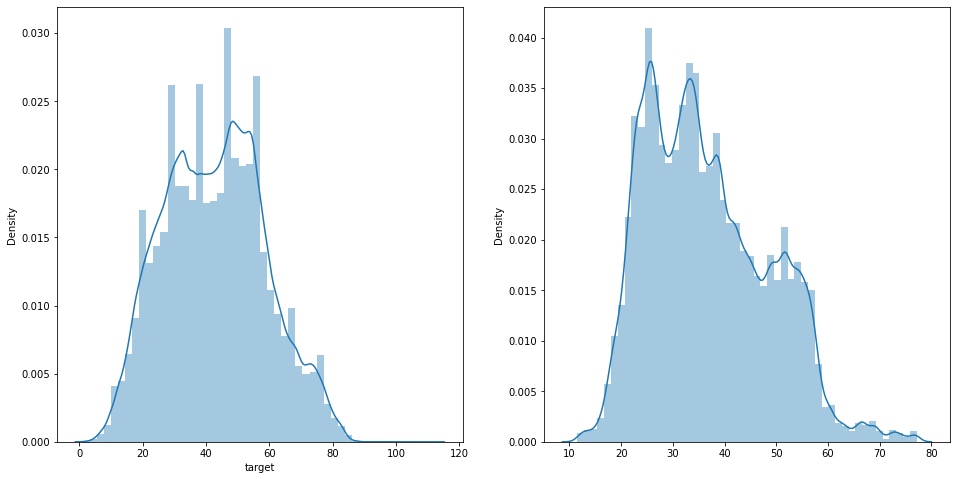

In [24]:
import matplotlib.pyplot as plt 
import seaborn as sns

predsTest = LR.predict(X_test)

# 제일 성적 잘 나온걸 LGBMRegressor 로 돌려보자!

fig, (ax1, ax2) = plt.subplots(ncols = 2)

fig.set_size_inches(16, 8)

sns.distplot(y_train, ax = ax1 , bins= 50 )

sns.distplot(np.exp(predsTest) , ax = ax2 , bins = 50 )


In [25]:
sample_submission = pd.read_csv("sample_submission.csv")

sample_submission

# 앞서 log를 씌웠기 때문에 다시 지수(exp)를 씌워준다.

sample_submission['target'] = np.exp(predsTest)


print(sample_submission.shape)


sample_submission.head(10)

(291241, 2)


,id,target
0,TEST_000000,26.824374
1,TEST_000001,45.350907
2,TEST_000002,60.249253
3,TEST_000003,38.093396
4,TEST_000004,38.834214
5,TEST_000005,49.557159
6,TEST_000006,31.161282
7,TEST_000007,64.223518
8,TEST_000008,49.536697
9,TEST_000009,46.256004


In [26]:
np.exp(predsTest).shape

(291241,)

In [27]:
sample_submission.to_csv("submission1.csv" ,  index = False)

# 리더보드 확인 결과 성적은 4.9 정도! 등수는 360등 정도.

# LGBM으로 측정함.

-------------------

RandomForestRegressor은?

In [28]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)

y_train_log = np.log1p(y_train)
rfModel.fit(X_train, y_train_log)

# 내가 만든 모델이 작동하는지 그냥 한번 체크
preds = rfModel.predict(X_train)
score = rmsle(np.exp(y_train_log), np.exp(preds), False)
print ("RMSLE Value For Random Forest: ",score)

RMSLE Value For Random Forest:  0.14445368865041294


C:\Users\SEO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SEO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

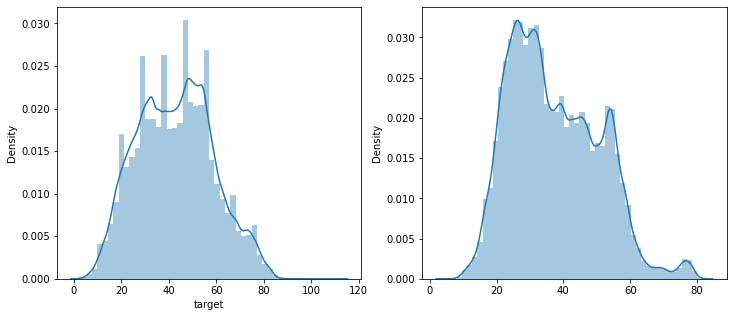

In [29]:
predsTest = rfModel.predict(X_test)

# train 셋과 test셋의 count 분포 확인 -> 비슷하게 나온다.

fig, (ax1, ax2) = plt.subplots(ncols = 2)

fig.set_size_inches(12, 5)

sns.distplot(y_train, ax = ax1 , bins= 50 )
# y_train 값

sns.distplot(np.exp(predsTest) , ax = ax2 , bins = 50 )
# y_test의 예측 값

In [30]:
sample_submission = pd.read_csv("sample_submission.csv")

sample_submission

# 앞서 log를 씌웠기 때문에 다시 지수(exp)를 씌워준다.

sample_submission['target'] = np.exp(predsTest)


print(sample_submission.shape)


sample_submission.head(10)

(291241, 2)


,id,target
0,TEST_000000,25.081410
1,TEST_000001,45.261692
2,TEST_000002,66.115326
3,TEST_000003,38.625622
4,TEST_000004,46.222746
5,TEST_000005,51.175878
6,TEST_000006,23.507474
7,TEST_000007,67.282265
8,TEST_000008,46.190509
9,TEST_000009,50.847855


In [31]:
np.exp(predsTest).shape

(291241,)

In [32]:
sample_submission.to_csv("submission2.csv" , index = False)


# 성적은 4.7 정도.  # 330등 정도.


# 임무를 정함.

# 1. 일단 모델 선정을 하나 또는 두개로 확실히 하고

# 2. 하이퍼 파라미터 튜닝을 한 다음에!

# 3. 그 다음에 피쳐 조합을 통해 성적을 끌어올리는게 좋겠다!

--------------

# 파이캐럿으로 돌려보자!

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import gc

In [34]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [35]:
str_col = ['day_of_week','start_turn_restricted','end_turn_restricted']
for i in str_col:
    le = LabelEncoder()
    le=le.fit(train[i])
    train[i]=le.transform(train[i])
    
    for label in np.unique(test[i]):
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test[i]=le.transform(test[i])

In [36]:
y_train = train['target'] 

X_train = train.drop(['id','base_date', 'target','road_name', 'start_node_name', 'end_node_name','vehicle_restricted'], axis=1)

X_test = test.drop(['id','base_date', 'road_name', 'start_node_name', 'end_node_name','vehicle_restricted'], axis=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(4701217, 16)
(4701217,)
(291241, 16)


In [38]:
y_train = train['target'] 

In [39]:
# RandomForestRegressor 로 모델링!

from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=5)

y_train_log = np.log1p(y_train)
rfModel.fit(X_train, y_train_log)

# RMSLE 는 너무 오래 걸리니 하지 않음




RandomForestRegressor(n_estimators=5)

C:\Users\SEO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SEO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

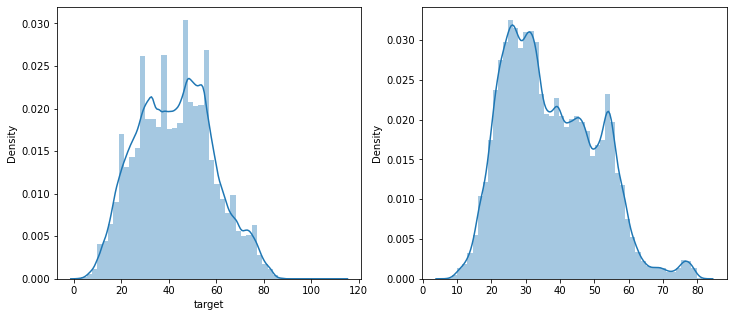

In [40]:
predsTest = rfModel.predict(X_test)

# train 셋과 test셋의 count 분포 확인 -> 비슷하게 나온다.

fig, (ax1, ax2) = plt.subplots(ncols = 2)

fig.set_size_inches(12, 5)

sns.distplot(y_train, ax = ax1 , bins= 50 )
# y_train 값

sns.distplot(np.exp(predsTest) , ax = ax2 , bins = 50 )
# y_test의 예측 값

In [41]:
sample_submission = pd.read_csv("sample_submission.csv")

sample_submission

# 앞서 log를 씌웠기 때문에 다시 지수(exp)를 씌워준다.

sample_submission['target'] = np.exp(predsTest)


print(sample_submission.shape)


sample_submission.head(10)

(291241, 2)


,id,target
0,TEST_000000,24.902173
1,TEST_000001,45.417323
2,TEST_000002,65.474483
3,TEST_000003,39.062767
4,TEST_000004,45.922386
5,TEST_000005,50.776716
6,TEST_000006,25.348845
7,TEST_000007,68.012334
8,TEST_000008,46.078372
9,TEST_000009,52.514965


In [42]:
sample_submission.to_csv("submission3.csv" , index = False)

# 데이콘 제출 성적은 4.4 290등 정도.

# 아까는 4.75 였는데  큰 차이. n_estimators 가 높다고 무조건 좋은게 아니구나!

# 성적이 살짝 높아짐.

-----------

ExtraTreesRegressor

In [60]:
from sklearn.ensemble import ExtraTreesRegressor

rf = ExtraTreesRegressor(n_estimators = 5 , random_state = 2)

y_train_log = np.log1p(y_train)
rf.fit(X_train, y_train_log)

ExtraTreesRegressor(n_estimators=5, random_state=2)

C:\Users\SEO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SEO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

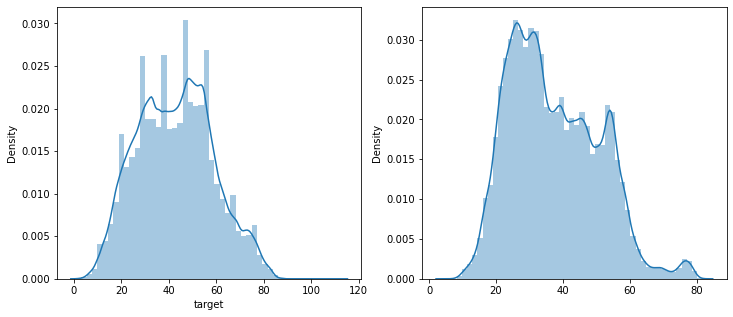

In [61]:
predsTest2 = rf.predict(X_test)

# train 셋과 test셋의 count 분포 확인 -> 비슷하게 나온다.

fig, (ax1, ax2) = plt.subplots(ncols = 2)

fig.set_size_inches(12, 5)

sns.distplot(y_train, ax = ax1 , bins= 50 )
# y_train 값

sns.distplot(np.exp(predsTest2) , ax = ax2 , bins = 50 )
# y_test의 예측 값

In [62]:
sample_submission = pd.read_csv("sample_submission.csv")

sample_submission

# 앞서 log를 씌웠기 때문에 다시 지수(exp)를 씌워준다.

sample_submission['target'] = np.exp(predsTest2)


print(sample_submission.shape)


sample_submission.head(10)

(291241, 2)


,id,target
0,TEST_000000,25.158395
1,TEST_000001,45.290022
2,TEST_000002,66.016719
3,TEST_000003,38.658285
4,TEST_000004,46.212247
5,TEST_000005,51.153355
6,TEST_000006,23.871100
7,TEST_000007,67.298281
8,TEST_000008,46.167333
9,TEST_000009,50.819134


In [63]:
sample_submission.to_csv("sample_submission4.csv" , index = False)

# 성적은 3.98 230등이었나? 그랬음.

-----

In [55]:
# XGBRegressor

from xgboost import XGBRegressor

rf2  = XGBRegressor(n_estimators = 5)

y_train_log = np.log1p(y_train)
rf2.fit(X_train, y_train_log)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=5, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

C:\Users\SEO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SEO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

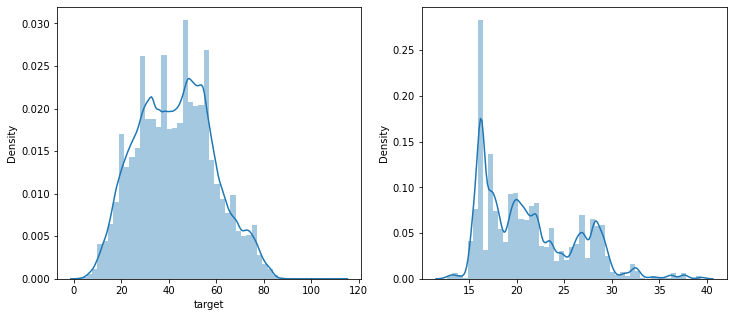

In [56]:
predsTest3 = rf2.predict(X_test)

# train 셋과 test셋의 count 분포 확인 -> 비슷하게 나온다.

fig, (ax1, ax2) = plt.subplots(ncols = 2)

fig.set_size_inches(12, 5)

sns.distplot(y_train, ax = ax1 , bins= 50 )
# y_train 값

sns.distplot(np.exp(predsTest3) , ax = ax2 , bins = 50 )
# y_test의 예측 값

In [57]:
sample_submission = pd.read_csv("sample_submission.csv")

sample_submission

# 앞서 log를 씌웠기 때문에 다시 지수(exp)를 씌워준다.

sample_submission['target'] = np.exp(predsTest3)


print(sample_submission.shape)


sample_submission.head(10)

(291241, 2)


,id,target
0,TEST_000000,16.268560
1,TEST_000001,27.036377
2,TEST_000002,29.080847
3,TEST_000003,18.950073
4,TEST_000004,19.748024
5,TEST_000005,26.629519
6,TEST_000006,20.017815
7,TEST_000007,36.086132
8,TEST_000008,27.925047
9,TEST_000009,27.625116


In [58]:
sample_submission.to_csv("submission4.csv", index = False)

# 성적은 15.0634942074

------------

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_validate


params = [{
    
    'n_estimators' : [2, 5 , 10], 'max_features': [2, 4, 6, 8]
}]

In [70]:
rf = ExtraTreesRegressor(random_state = 0 , n_jobs = -1)

grid_cv = GridSearchCV( rf ,param_grid = params , cv = 5 , n_jobs = -1 , scoring='neg_mean_squared_error')

grid_cv.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [2, 5, 10]}],
             scoring='neg_mean_squared_error')

In [66]:
grid_cv.best_params_

{'max_features': 4, 'n_estimators': 5}

In [67]:
preds = grid_cv.predict(X_test)

In [68]:
sample_submission = pd.read_csv('./sample_submission.csv')

sample_submission['target'] = preds

preds

array([24.47058824, 44.36111111, 65.33333333, ..., 22.43243243,
       24.13888889, 46.83333333])

In [ ]:
sample_submission.to_csv("n_estimators5 tuning.csv", index = False)


# 성적은 3.87 180등 정도

# 'max_features': 4, 'n_estimators': 5 로 하기.

---

In [ ]:
RandomForestRegressor 튜닝 은 다른 파일에 있음

----

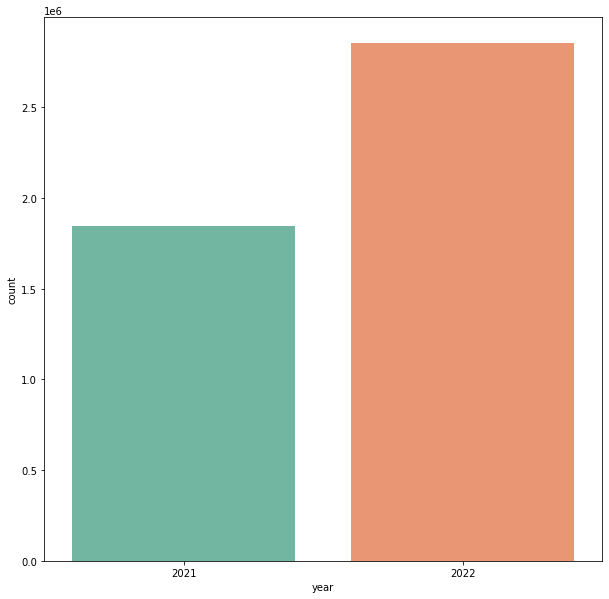

In [9]:
# 일단 year을 추가 하기로 했음!

plt.figure(figsize = ( 10, 10))

sns.countplot(data = train , x = 'year' , palette = 'Set2')

plt.show()

# 년도 자료를 넣으면 test는 2022년 8월 것이니 최근 추세를 더 잘 반영한다고 생각함.

In [12]:
train = pd.read_csv("train.csv" , parse_dates = ["base_date"])
test = pd.read_csv("test.csv" , parse_dates = ["base_date"])

In [13]:
train["year"] = train["base_date"].dt.year
test["year"] = test["base_date"].dt.year

In [14]:
from sklearn.preprocessing import LabelEncoder

str_col = ['day_of_week','start_turn_restricted','end_turn_restricted']
for i in str_col:
    le = LabelEncoder()
    le=le.fit(train[i])
    train[i]=le.transform(train[i])
    
    for label in np.unique(test[i]):
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test[i]=le.transform(test[i])

In [15]:
y_train = train['target'] 

X_train = train.drop(['id','base_date', 'target','road_name', 'start_node_name', 'end_node_name','vehicle_restricted' , "height_restricted"], axis=1)

X_test = test.drop(['id','base_date', 'road_name', 'start_node_name', 'end_node_name','vehicle_restricted' , "height_restricted"], axis=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

# year은 레이블 인코딩 해주니 더 성적이 낮아짐!

(4701217, 16)
(4701217,)
(291241, 16)


In [16]:
X_train

,day_of_week,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_latitude,start_longitude,start_turn_restricted,end_latitude,end_longitude,end_turn_restricted,year
0,1,17,1,106,0,0,60.0,32400.0,3,33.427747,126.662612,0,33.427749,126.662335,0,2022
1,1,21,2,103,0,0,60.0,0.0,0,33.500730,126.529107,1,33.504811,126.526240,0,2022
2,4,7,2,103,0,0,80.0,0.0,0,33.279145,126.368598,0,33.280072,126.362147,0,2021
3,0,13,2,107,0,0,50.0,0.0,0,33.246081,126.567204,0,33.245565,126.566228,0,2022
4,6,8,2,103,0,0,80.0,0.0,0,33.462214,126.326551,0,33.462677,126.330152,0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,1,16,1,107,0,0,50.0,0.0,0,33.422145,126.278125,0,33.420955,126.273750,0,2021
4701213,1,2,2,107,0,0,80.0,43200.0,3,33.472505,126.424368,0,33.472525,126.424890,0,2022
4701214,3,22,2,103,0,0,60.0,0.0,0,33.447183,126.912579,0,33.444121,126.912948,0,2022
4701215,2,2,2,103,0,0,80.0,0.0,0,33.443596,126.431817,0,33.444996,126.433332,0,2021


In [17]:
X_test

,day_of_week,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_latitude,start_longitude,start_turn_restricted,end_latitude,end_longitude,end_turn_restricted,year
0,1,17,3,107,0,0,70.0,0.0,0,33.499427,126.541298,0,33.500772,126.543837,1,2022
1,6,12,2,103,0,0,70.0,0.0,3,33.258507,126.427003,0,33.258119,126.415840,0,2022
2,0,2,1,103,0,0,60.0,0.0,0,33.258960,126.476508,0,33.259206,126.474687,0,2022
3,1,23,3,103,0,0,70.0,0.0,0,33.473494,126.545647,0,33.471061,126.545467,0,2022
4,2,17,3,106,0,0,70.0,0.0,0,33.501477,126.569223,0,33.496863,126.581230,0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291236,5,5,1,103,0,0,80.0,0.0,0,33.472819,126.463030,0,33.470483,126.460846,0,2022
291237,0,20,2,103,0,0,60.0,0.0,0,33.305359,126.598914,0,33.300796,126.600332,0,2022
291238,0,11,1,107,0,0,30.0,0.0,0,33.493624,126.496769,1,33.497500,126.496946,1,2022
291239,0,7,2,107,0,0,60.0,0.0,0,33.254782,126.507014,0,33.255659,126.507333,0,2022


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_validate


params = [{
    
    'n_estimators' : [5], 'max_features': [4]
}]




In [19]:
rf = ExtraTreesRegressor(random_state = 0 , n_jobs = -1)

grid_cv = GridSearchCV( rf ,param_grid = params , cv = 5 , n_jobs = -1 , scoring='neg_mean_squared_error')

grid_cv.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1, param_grid=[{'max_features': [4], 'n_estimators': [5]}],
             scoring='neg_mean_squared_error')

In [20]:
#{'max_features': 4, 'n_estimators': 5}

preds = grid_cv.predict(X_test)

<AxesSubplot:ylabel='Density'>

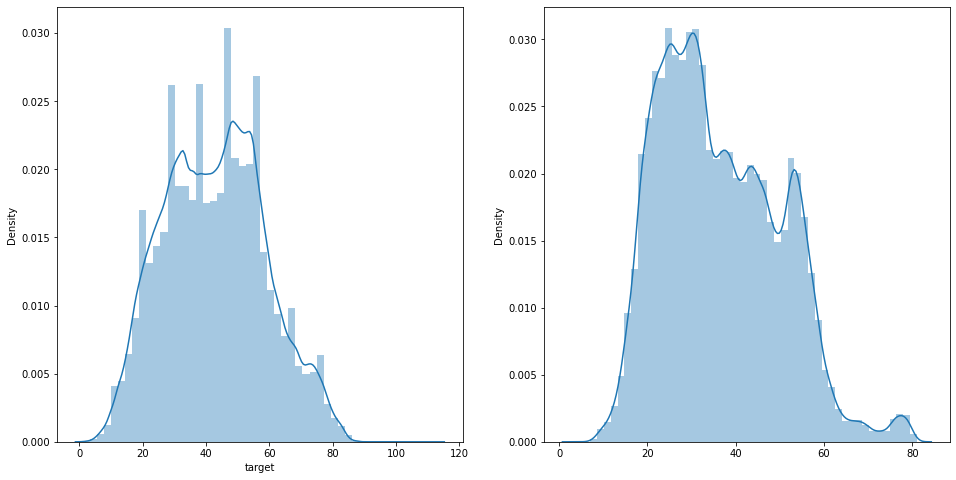

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)

fig.set_size_inches(16, 8)

sns.distplot(y_train, ax = ax1 , bins= 50 )

sns.distplot(preds , ax = ax2 , bins = 50 )

In [22]:
sample_submission = pd.read_csv('./sample_submission.csv')

In [23]:
sample_submission['target'] = preds
sample_submission.to_csv("year.csv", index = False)

In [24]:
sample_submission

,id,target
0,TEST_000000,26.684211
1,TEST_000001,43.125000
2,TEST_000002,68.454545
3,TEST_000003,37.894737
4,TEST_000004,43.545455
...,...,...
291236,TEST_291236,48.541667
291237,TEST_291237,51.809524
291238,TEST_291238,21.739130
291239,TEST_291239,24.750000


In [ ]:
# year 의 점수는? 3.6425419855

# 아까는 3.87 정도 였는데 꽤 오름! 이 때 등수는 100등 언저리


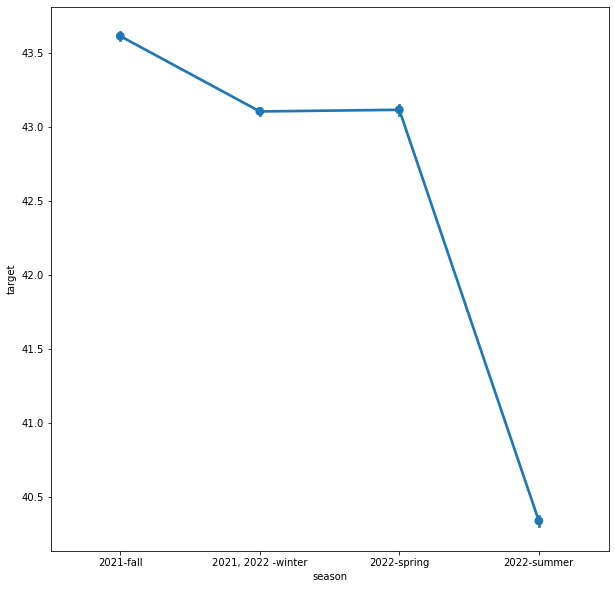

In [19]:
# season을 넣어주면 어떨까?

group_names_season = ['2021-fall' , '2021, 2022 -winter' , '2022-spring' , '2022-summer'      ]


plt.figure(figsize = (10 , 10))

sns.pointplot(data =train , x = 'season' , y = 'target', order = group_names_season )

plt.show()



2022년 여름에 속도가 훅 떨어지니 최근의 경향을 더 잘 반영할 수 있지 않을까 생각!

In [27]:
train = pd.read_csv("train.csv" , parse_dates = ["base_date"])
test = pd.read_csv("test.csv" , parse_dates = ["base_date"])

In [30]:
train['year'] = train['base_date'].dt.year
train['month'] = train['base_date'].dt.month

In [31]:
date = ['year' , 'month']


train['year-month'] = train[date].apply(lambda row : '-'.join(row.values.astype(str)) , axis = 1  )

In [32]:
# 계절별 분리!

def season(x):

    if (x == '2021-9' or x == '2021-10' or x == '2021-11'):
        
        return "2021-fall"
    
    elif (x == '2021-12' or x == '2022-1' or x == '2022-2'):
        return "2021, 2022 -winter"
    
    elif ( x == '2022-3' or x == '2022-5'):
        return "2022-spring"
    
    else:
        return "2022-summer"
    

In [33]:
train['season'] = train['year-month'].apply(lambda x : season(x) )

In [34]:
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,year-month,season
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0,2022,6,2022-6,2022-summer
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0,2022,7,2022-7,2022-summer
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0,2021,10,2021-10,2021-fall
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0,2022,3,2022-3,2022-spring
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0,2021,10,2021-10,2021-fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,16,1,107,-,0,0,50.0,0.0,0.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0,2021,11,2021-11,2021-fall
4701213,TRAIN_4701213,2022-03-31,목,2,2,107,-,0,0,80.0,0.0,43200.0,0.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0,2022,3,2022-3,2022-spring
4701214,TRAIN_4701214,2022-06-13,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0,2022,6,2022-6,2022-summer
4701215,TRAIN_4701215,2021-10-20,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0,2021,10,2021-10,2021-fall


In [36]:
test['year'] = test['base_date'].dt.year
test['month'] = test['base_date'].dt.month

In [37]:
date = ['year' , 'month']


test['year-month'] = test[date].apply(lambda row : '-'.join(row.values.astype(str)) , axis = 1  )

In [38]:
test['season'] = test['year-month'].apply(lambda x : season(x) )

In [39]:
test


# test.csv는 다 2022년 8월이기 때문에 2022-summer 로 표시

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,year-month,season
0,TEST_000000,2022-08-25,목,17,3,107,연삼로,0,0,70.0,0.0,0.0,0.0,0,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음,2022,8,2022-8,2022-summer
1,TEST_000001,2022-08-09,화,12,2,103,일반국도12호선,0,0,70.0,0.0,0.0,0.0,3,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음,2022,8,2022-8,2022-summer
2,TEST_000002,2022-08-05,금,2,1,103,일반국도16호선,0,0,60.0,0.0,0.0,0.0,0,도순3교,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음,2022,8,2022-8,2022-summer
3,TEST_000003,2022-08-18,목,23,3,103,일반국도11호선,0,0,70.0,0.0,0.0,0.0,0,아라주공아파트,33.473494,126.545647,없음,인다마을,33.471061,126.545467,없음,2022,8,2022-8,2022-summer
4,TEST_000004,2022-08-10,수,17,3,106,번영로,0,0,70.0,0.0,0.0,0.0,0,부록교 시종점,33.501477,126.569223,없음,봉개교 시종점,33.496863,126.581230,없음,2022,8,2022-8,2022-summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291236,TEST_291236,2022-08-27,토,5,1,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,월산마을,33.472819,126.463030,없음,도근교,33.470483,126.460846,없음,2022,8,2022-8,2022-summer
291237,TEST_291237,2022-08-19,금,20,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,영주교,33.305359,126.598914,없음,하례입구삼거리,33.300796,126.600332,없음,2022,8,2022-8,2022-summer
291238,TEST_291238,2022-08-05,금,11,1,107,신대로,0,0,30.0,0.0,0.0,0.0,0,마리나사거리,33.493624,126.496769,있음,칠오광장사거리,33.497500,126.496946,있음,2022,8,2022-8,2022-summer
291239,TEST_291239,2022-08-12,금,7,2,107,경찰로,0,0,60.0,0.0,0.0,0.0,0,국민의료보험관리공단,33.254782,126.507014,없음,의료보험조합,33.255659,126.507333,없음,2022,8,2022-8,2022-summer


In [40]:
# season 추가

str_col = ['day_of_week','start_turn_restricted','end_turn_restricted' , 'season']
for i in str_col:
    le = LabelEncoder()
    le=le.fit(train[i])
    train[i]=le.transform(train[i])
    
    for label in np.unique(test[i]):
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test[i]=le.transform(test[i])

In [42]:
y_train = train['target'] 

X_train = train.drop(['id','base_date', 'target','road_name', 'start_node_name' ,  'end_node_name','vehicle_restricted' , "height_restricted" , 'month' , 'year-month' ], axis=1)

X_test = test.drop(['id','base_date' , 'road_name' , 'start_node_name' , 'end_node_name','vehicle_restricted' , "height_restricted" , 'month'  , 'year-month'], axis=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(4701217, 17)
(4701217,)
(291241, 17)


In [43]:
X_train

,day_of_week,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_latitude,start_longitude,start_turn_restricted,end_latitude,end_longitude,end_turn_restricted,year,season
0,1,17,1,106,0,0,60.0,32400.0,3,33.427747,126.662612,0,33.427749,126.662335,0,2022,3
1,1,21,2,103,0,0,60.0,0.0,0,33.500730,126.529107,1,33.504811,126.526240,0,2022,3
2,4,7,2,103,0,0,80.0,0.0,0,33.279145,126.368598,0,33.280072,126.362147,0,2021,1
3,0,13,2,107,0,0,50.0,0.0,0,33.246081,126.567204,0,33.245565,126.566228,0,2022,2
4,6,8,2,103,0,0,80.0,0.0,0,33.462214,126.326551,0,33.462677,126.330152,0,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,1,16,1,107,0,0,50.0,0.0,0,33.422145,126.278125,0,33.420955,126.273750,0,2021,1
4701213,1,2,2,107,0,0,80.0,43200.0,3,33.472505,126.424368,0,33.472525,126.424890,0,2022,2
4701214,3,22,2,103,0,0,60.0,0.0,0,33.447183,126.912579,0,33.444121,126.912948,0,2022,3
4701215,2,2,2,103,0,0,80.0,0.0,0,33.443596,126.431817,0,33.444996,126.433332,0,2021,1


In [44]:
X_test

,day_of_week,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_latitude,start_longitude,start_turn_restricted,end_latitude,end_longitude,end_turn_restricted,year,season
0,1,17,3,107,0,0,70.0,0.0,0,33.499427,126.541298,0,33.500772,126.543837,1,2022,3
1,6,12,2,103,0,0,70.0,0.0,3,33.258507,126.427003,0,33.258119,126.415840,0,2022,3
2,0,2,1,103,0,0,60.0,0.0,0,33.258960,126.476508,0,33.259206,126.474687,0,2022,3
3,1,23,3,103,0,0,70.0,0.0,0,33.473494,126.545647,0,33.471061,126.545467,0,2022,3
4,2,17,3,106,0,0,70.0,0.0,0,33.501477,126.569223,0,33.496863,126.581230,0,2022,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291236,5,5,1,103,0,0,80.0,0.0,0,33.472819,126.463030,0,33.470483,126.460846,0,2022,3
291237,0,20,2,103,0,0,60.0,0.0,0,33.305359,126.598914,0,33.300796,126.600332,0,2022,3
291238,0,11,1,107,0,0,30.0,0.0,0,33.493624,126.496769,1,33.497500,126.496946,1,2022,3
291239,0,7,2,107,0,0,60.0,0.0,0,33.254782,126.507014,0,33.255659,126.507333,0,2022,3


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_validate


params = [{
    
    'n_estimators' : [5], 'max_features': [4]
}]


In [46]:
rf = ExtraTreesRegressor(random_state = 0 , n_jobs = -1)

grid_cv = GridSearchCV( rf ,param_grid = params , cv = 5 , n_jobs = -1 , scoring='neg_mean_squared_error')

grid_cv.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1, param_grid=[{'max_features': [4], 'n_estimators': [5]}],
             scoring='neg_mean_squared_error')

In [47]:
#{'max_features': 4, 'n_estimators': 5}

preds = grid_cv.predict(X_test)

<AxesSubplot:ylabel='Density'>

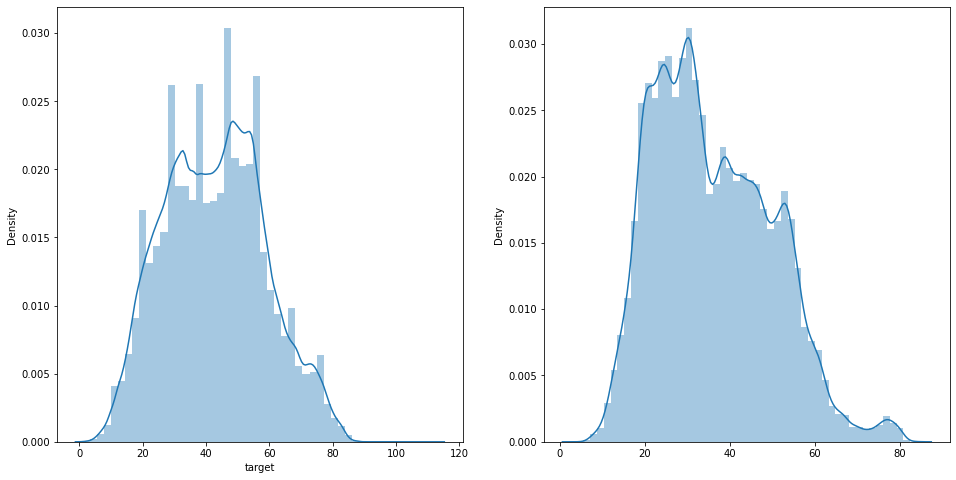

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)

fig.set_size_inches(16, 8)

sns.distplot(y_train, ax = ax1 , bins= 50 )

sns.distplot(preds , ax = ax2 , bins = 50 )

In [ ]:
sample_submission = pd.read_csv('./sample_submission.csv')

In [ ]:
sample_submission['target'] = preds
sample_submission.to_csv("year , season.csv", index = False)

In [ ]:
sample_submission

# season 을 넣으면 성적은? 

# 75등

# 마무리

In [19]:
train = pd.read_csv("train.csv" , parse_dates = ["base_date"])
test = pd.read_csv("test.csv" , parse_dates = ["base_date"])

In [20]:
train["year"] = train["base_date"].dt.year
train["year2"] = train["base_date"].dt.year

test["year"] = test["base_date"].dt.year
test["year2"] = test["base_date"].dt.year

# year 을 한번 더 넣어서 2022년 추세에 좀 더 가중치를 줄까 하는 의도!

# season은 한번 더 넣으니까 성적이 떨어지더라구요.

train['month'] = train['base_date'].dt.month
test['month'] = test['base_date'].dt.month

train['quarter'] = train['base_date'].dt.quarter
test['quarter'] = test['base_date'].dt.quarter

# 분기 추가

In [ ]:
train["road_limit"] = train["road_rating"] * train["maximum_speed_limit"]
test["road_limit"] = test["road_rating"] * test["maximum_speed_limit"]

# 피쳐 조합

# 속도에 상관 있는 것들을 섞어서 피쳐 조합해줌 

In [22]:
train["lane_limit"] = train["lane_count"] * train["maximum_speed_limit"]
test["lane_limit"] = test["lane_count"] * test["maximum_speed_limit"]

# 피쳐 조합

In [23]:
date = ['year' , 'month']


train['year-month'] = train[date].apply(lambda row : '-'.join(row.values.astype(str)) , axis = 1  )
test['year-month'] = test[date].apply(lambda row : '-'.join(row.values.astype(str)) , axis = 1  )

In [24]:
# 계절별 분리!

def season(x):

    if (x == '2021-9' or x == '2021-10' or x == '2021-11'):
        
        return "2021-fall"
    
    elif (x == '2021-12' or x == '2022-1' or x == '2022-2'):
        return "2021, 2022 -winter"
    
    elif ( x == '2022-3' or x == '2022-5'):
        return "2022-spring"
    
    else:
        return "2022-summer"

In [25]:
train['season'] = train['year-month'].apply(lambda x : season(x) )
test['season'] = test['year-month'].apply(lambda x : season(x) )

# season도 season2 해서 넣어 봤는데 성적이 더 떨어짐!

In [26]:
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,year2,month,quarter,road_limit,lane_limit,year-month,season
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0,2022,2022,6,2,6360.0,60.0,2022-6,2022-summer
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0,2022,2022,7,3,6180.0,120.0,2022-7,2022-summer
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0,2021,2021,10,4,8240.0,160.0,2021-10,2021-fall
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0,2022,2022,3,1,5350.0,100.0,2022-3,2022-spring
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0,2021,2021,10,4,8240.0,160.0,2021-10,2021-fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,16,1,107,-,0,0,50.0,0.0,0.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0,2021,2021,11,4,5350.0,50.0,2021-11,2021-fall
4701213,TRAIN_4701213,2022-03-31,목,2,2,107,-,0,0,80.0,0.0,43200.0,0.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0,2022,2022,3,1,8560.0,160.0,2022-3,2022-spring
4701214,TRAIN_4701214,2022-06-13,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0,2022,2022,6,2,6180.0,120.0,2022-6,2022-summer
4701215,TRAIN_4701215,2021-10-20,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0,2021,2021,10,4,8240.0,160.0,2021-10,2021-fall


In [27]:
test

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,year2,month,quarter,road_limit,lane_limit,year-month,season
0,TEST_000000,2022-08-25,목,17,3,107,연삼로,0,0,70.0,0.0,0.0,0.0,0,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음,2022,2022,8,3,7490.0,210.0,2022-8,2022-summer
1,TEST_000001,2022-08-09,화,12,2,103,일반국도12호선,0,0,70.0,0.0,0.0,0.0,3,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음,2022,2022,8,3,7210.0,140.0,2022-8,2022-summer
2,TEST_000002,2022-08-05,금,2,1,103,일반국도16호선,0,0,60.0,0.0,0.0,0.0,0,도순3교,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음,2022,2022,8,3,6180.0,60.0,2022-8,2022-summer
3,TEST_000003,2022-08-18,목,23,3,103,일반국도11호선,0,0,70.0,0.0,0.0,0.0,0,아라주공아파트,33.473494,126.545647,없음,인다마을,33.471061,126.545467,없음,2022,2022,8,3,7210.0,210.0,2022-8,2022-summer
4,TEST_000004,2022-08-10,수,17,3,106,번영로,0,0,70.0,0.0,0.0,0.0,0,부록교 시종점,33.501477,126.569223,없음,봉개교 시종점,33.496863,126.581230,없음,2022,2022,8,3,7420.0,210.0,2022-8,2022-summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291236,TEST_291236,2022-08-27,토,5,1,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,월산마을,33.472819,126.463030,없음,도근교,33.470483,126.460846,없음,2022,2022,8,3,8240.0,80.0,2022-8,2022-summer
291237,TEST_291237,2022-08-19,금,20,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,영주교,33.305359,126.598914,없음,하례입구삼거리,33.300796,126.600332,없음,2022,2022,8,3,6180.0,120.0,2022-8,2022-summer
291238,TEST_291238,2022-08-05,금,11,1,107,신대로,0,0,30.0,0.0,0.0,0.0,0,마리나사거리,33.493624,126.496769,있음,칠오광장사거리,33.497500,126.496946,있음,2022,2022,8,3,3210.0,30.0,2022-8,2022-summer
291239,TEST_291239,2022-08-12,금,7,2,107,경찰로,0,0,60.0,0.0,0.0,0.0,0,국민의료보험관리공단,33.254782,126.507014,없음,의료보험조합,33.255659,126.507333,없음,2022,2022,8,3,6420.0,120.0,2022-8,2022-summer


In [28]:
# road_limit , lane_limit 추가

str_col = ['day_of_week','start_turn_restricted','end_turn_restricted' , 'season' ,'road_limit' , 'lane_limit'  ]

for i in str_col:
    le = LabelEncoder()
    le=le.fit(train[i])
    train[i]=le.transform(train[i])
    
    for label in np.unique(test[i]):
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test[i]=le.transform(test[i])

In [29]:
y_train = train['target'] 

X_train = train.drop(['id','base_date', 'target' , 'road_name' ,'start_node_name' ,'end_node_name','vehicle_restricted' , "height_restricted" , 'month'  , 'year-month' ,  'start_longitude' ,'end_longitude' , 'weight_restricted' ], axis=1)

X_test = test.drop(['id','base_date'  ,'road_name' ,'start_node_name' ,'end_node_name','vehicle_restricted' , "height_restricted" , 'month' , 'year-month'  , 'start_longitude' ,'end_longitude', 'weight_restricted' ], axis=1)

# 피쳐 제거

# start_longtitude , end_longtitue 제거 weight 도 삭제

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(4701217, 18)
(4701217,)
(291241, 18)


In [30]:
X_train

,day_of_week,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,road_type,start_latitude,start_turn_restricted,end_latitude,end_turn_restricted,year,year2,quarter,road_limit,lane_limit,season
0,1,17,1,106,0,0,60.0,3,33.427747,0,33.427749,0,2022,2022,2,8,3,3
1,1,21,2,103,0,0,60.0,0,33.500730,1,33.504811,0,2022,2022,3,7,8,3
2,4,7,2,103,0,0,80.0,0,33.279145,0,33.280072,0,2021,2021,4,13,11,1
3,0,13,2,107,0,0,50.0,0,33.246081,0,33.245565,0,2022,2022,1,6,7,2
4,6,8,2,103,0,0,80.0,0,33.462214,0,33.462677,0,2021,2021,4,13,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,1,16,1,107,0,0,50.0,0,33.422145,0,33.420955,0,2021,2021,4,6,2,1
4701213,1,2,2,107,0,0,80.0,3,33.472505,0,33.472525,0,2022,2022,1,15,11,2
4701214,3,22,2,103,0,0,60.0,0,33.447183,0,33.444121,0,2022,2022,2,7,8,3
4701215,2,2,2,103,0,0,80.0,0,33.443596,0,33.444996,0,2021,2021,4,13,11,1


In [31]:
X_test

,day_of_week,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,road_type,start_latitude,start_turn_restricted,end_latitude,end_turn_restricted,year,year2,quarter,road_limit,lane_limit,season
0,1,17,3,107,0,0,70.0,0,33.499427,0,33.500772,1,2022,2022,3,12,13,3
1,6,12,2,103,0,0,70.0,3,33.258507,0,33.258119,0,2022,2022,3,10,9,3
2,0,2,1,103,0,0,60.0,0,33.258960,0,33.259206,0,2022,2022,3,7,3,3
3,1,23,3,103,0,0,70.0,0,33.473494,0,33.471061,0,2022,2022,3,10,13,3
4,2,17,3,106,0,0,70.0,0,33.501477,0,33.496863,0,2022,2022,3,11,13,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291236,5,5,1,103,0,0,80.0,0,33.472819,0,33.470483,0,2022,2022,3,13,5,3
291237,0,20,2,103,0,0,60.0,0,33.305359,0,33.300796,0,2022,2022,3,7,8,3
291238,0,11,1,107,0,0,30.0,0,33.493624,1,33.497500,1,2022,2022,3,2,0,3
291239,0,7,2,107,0,0,60.0,0,33.254782,0,33.255659,0,2022,2022,3,9,8,3


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_validate


params = [{
    
    'n_estimators' : [5], 'max_features': [4]
}]

In [33]:
rf = ExtraTreesRegressor(random_state = 0 , n_jobs = -1)

grid_cv = GridSearchCV( rf ,param_grid = params , cv = 5 , n_jobs = -1 , scoring='neg_mean_squared_error')

y_train_log = np.log1p(y_train)

grid_cv.fit(X_train , y_train_log)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1, param_grid=[{'max_features': [4], 'n_estimators': [5]}],
             scoring='neg_mean_squared_error')

In [34]:
#{'max_features': 4, 'n_estimators': 5}

predsTest = grid_cv.predict(X_test)

<AxesSubplot:ylabel='Density'>

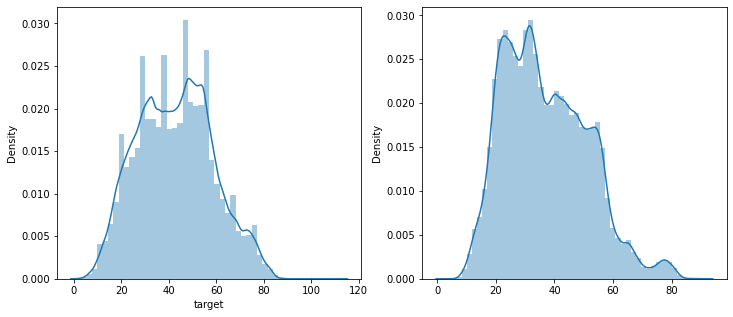

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)

fig.set_size_inches(12, 5)

sns.distplot(y_train, ax = ax1 , bins= 50 )
# y_train 값

sns.distplot(np.exp(predsTest) , ax = ax2 , bins = 50 )

# y_test의 예측 값


In [ ]:
sample_submission = pd.read_csv('./sample_submission.csv')

In [ ]:
sample_submission['target'] = preds
sample_submission.to_csv("제주도 최종.csv", index = False)

In [ ]:
sample_submission

# 좋은점, 아쉬운 점